In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set_theme(context='paper', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

## Estimate the market share os screens >= 1280 & >= 720

In [2]:
resolution_stats = pd.read_csv("res_stats.csv")

In [3]:
resolution_stats.iloc[20,0] = "-1x-1"

In [4]:
resolution_stats.head(2)

,Screen Resolution,Market Share Perc. (Sept 2021 - Sept 2022)
0,1920x1080,22.55
1,1366x768,18.43


In [5]:
numpy_x_y = np.zeros((len(resolution_stats),2))

In [6]:
for i, row in resolution_stats.iterrows():
    x, y = row["Screen Resolution"].split("x")
    numpy_x_y[i,:] = (int(x),int(y))

In [7]:
resolution_stats["x"] = numpy_x_y[:,0]
resolution_stats["y"] = numpy_x_y[:,1]

In [8]:
resolution_stats[(resolution_stats.x >= 1280) & (resolution_stats.y >= 720)]["Market Share Perc. (Sept 2021 - Sept 2022)"].sum()

77.15000000000002

## Load all the Dataset Data

In [9]:
import os
import json

PRE_PROCESS_DATA_FOLDER = "pre_processed_data"

In [10]:
def infer_column_type(column:pd.Series):
    try:
        column = pd.to_numeric(column)
    except:
        print("Failed cast to a numeric type.")
    if column[0] == "False":
        
         False
    elif column[0] == "True":
        column = True
    column = column.astype(str)
    return column


In [11]:
data_list = []

for file in os.listdir(PRE_PROCESS_DATA_FOLDER):
    if ".json" not in file:
        continue
    with open(os.path.join(PRE_PROCESS_DATA_FOLDER, file), "r") as f:
        load_data = json.load(f)
    data_list.append(pd.Series(list(load_data.values()), index=load_data.keys()))

In [12]:
all_data = pd.DataFrame(data_list)

In [13]:
all_data[all_data.set_name == "mturk_DE_v01"].set_trials.apply(len)

93     10
147    10
178    10
198    10
223    10
288    10
320    10
325    10
334    10
Name: set_trials, dtype: int64

In [14]:
" ".join(all_data[all_data["set_name"] == "mturk_EN_v01"]["set_trials"][0])

'meco_para_3 a_ScottishParliament_2 a_Rhine_3 a_FresnoCalifornia_3 a_MartinLuther_2 a_Amazonrainforest_4 a_Chloroplast_2 a_NikolaTesla_1 a_UniversityofChicago_3 a_VictoriaAustralia_2'

In [15]:
all_data[all_data["set_name"] == "mturk_EN_v01"]["set_trials"].apply(" ".join) == " ".join(all_data[all_data["set_name"] == "mturk_EN_v01"]["set_trials"][0])

0      True
29     True
136    True
172    True
220    True
277    True
278    True
308    True
Name: set_trials, dtype: bool

In [16]:
all_sets_have_the_same_set_trials = True
for set_name in np.unique(all_data["set_name"]):
    first_row = " ".join(all_data[all_data["set_name"] == set_name]["set_trials"].iloc[0])
    set_trials_part = all_data[all_data["set_name"] == set_name]["set_trials"].apply(" ".join)
    check = (first_row == set_trials_part).all()
    all_sets_have_the_same_set_trials = check and all_sets_have_the_same_set_trials
print(all_sets_have_the_same_set_trials)

True


<Axes: >

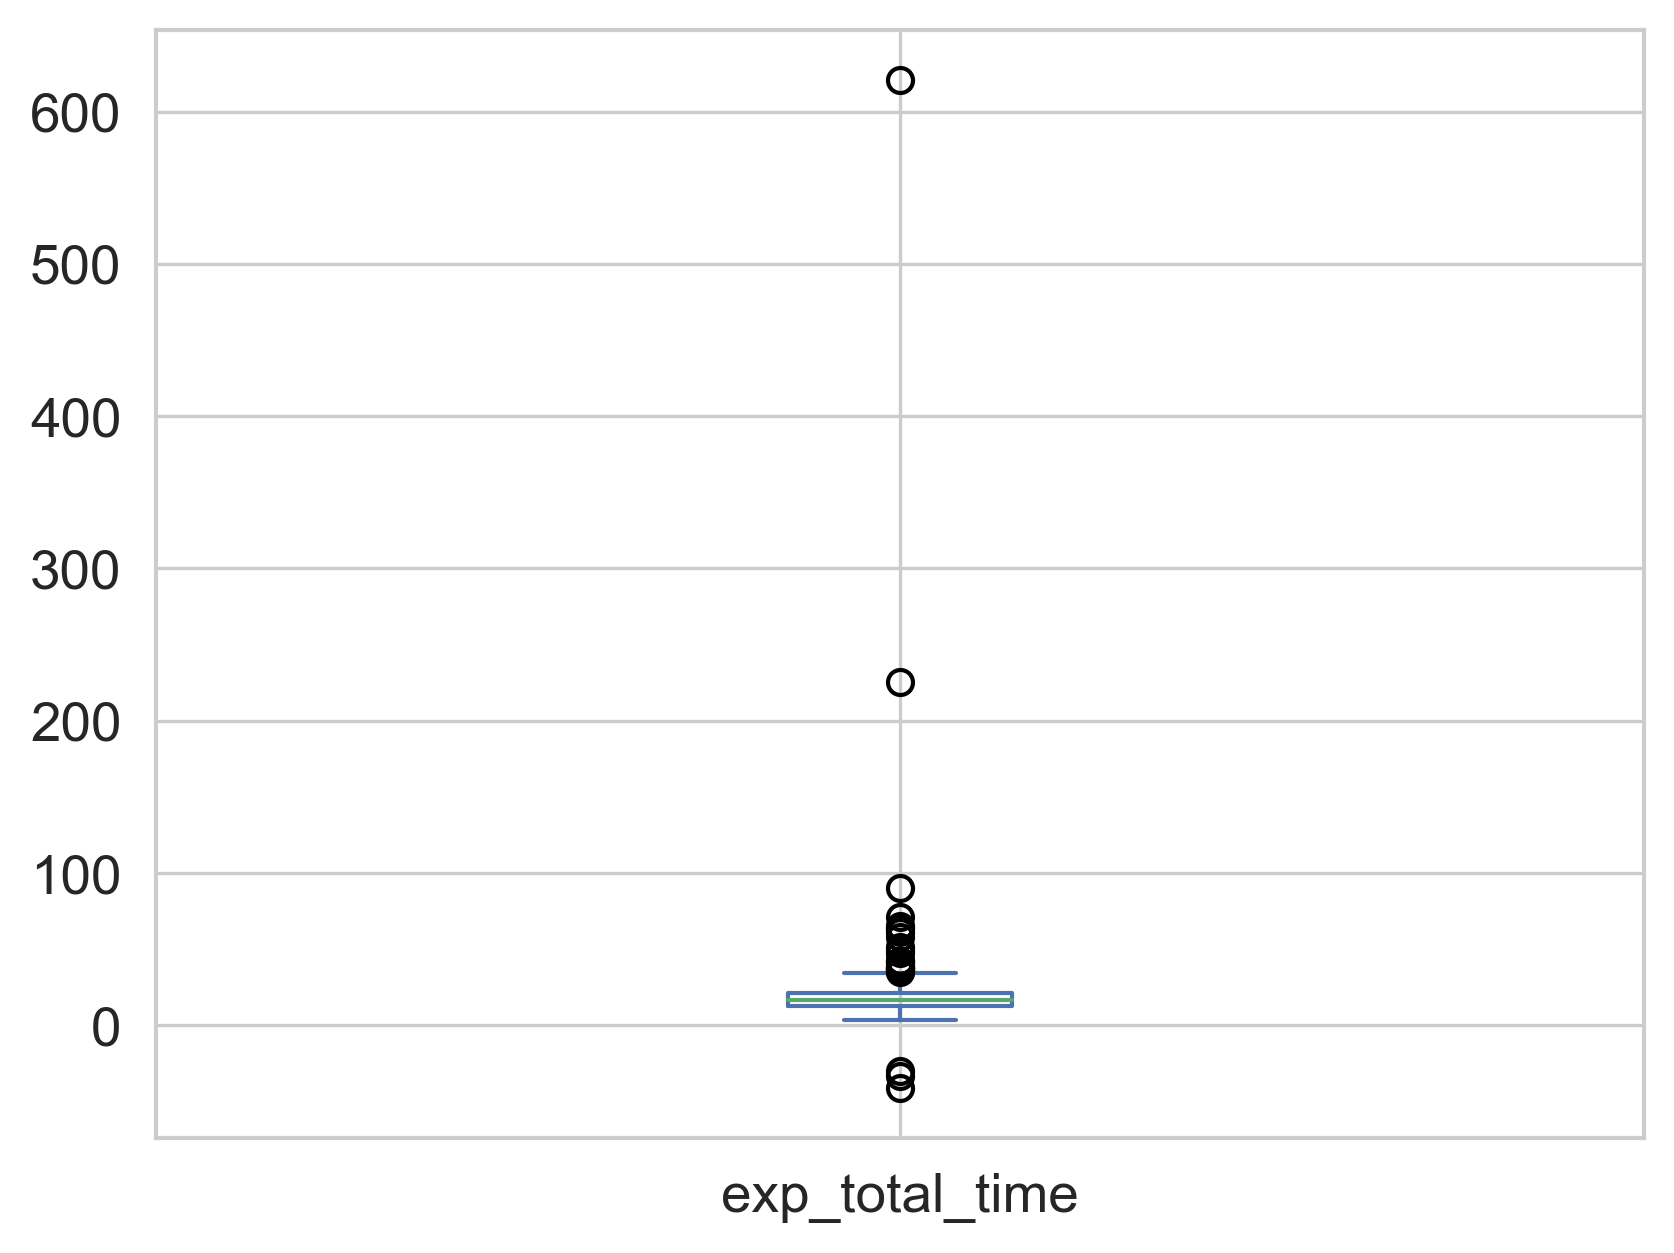

In [17]:
(all_data.exp_total_time * 1.66667e-5).plot.box()

In [18]:
all_data.fixation_error.value_counts()

fixation_error
False    551
True      32
Name: count, dtype: int64

In [19]:
all_data[all_data.fixation_error == False]

,worker_id,worker_age,worker_lang,worker_fluency,set_name,set_trials,target_error,screen_x,screen_y,webgazer_raw_data,...,question_9_name,question_9_time,question_9_answer,question_9_correct_flag,question_9_target_to_fixation_ratio,set_language,fixation_error,participant_type,platform_type,vision
0,A10BH9PYCYUKDJ,42,English,5,mturk_EN_v01,"[meco_para_3, a_ScottishParliament_2, a_Rhine_...",False,1366.0,768.0,"{""meco_para_3"": [[894, 425, 13], [807, 401, 84...",...,q_after_a_VictoriaAustralia_2_qa_0,4544.0,car,1.0,0.017467,EN,False,NaN,NaN,NaN
2,A10W3EILX06DFO,35,English,5,mturk_EN_v20,"[meco_para_11, a_Steamengine_0, a_Oxygen_1, a_...",False,1821.0,1024.0,"{""meco_para_11"": [[1090, 943, 20], [1051, 646,...",...,q_after_a_SkyUnitedKingdom_4_qa_2,17068.0,virgin media,1.0,0.000000,EN,False,NaN,NaN,NaN
3,A11C5FSSHQEQ3E,38,English,5,mturk_EN_v13,"[meco_para_12, a_DoctorWho_4, a_VictoriaAustra...",False,2000.0,1125.0,"{""meco_para_12"": [[1323, 652, 46], [1173, 531,...",...,q_after_a_FresnoCalifornia_0_qa_0,12718.0,southwest Fresno,1.0,0.000000,EN,False,NaN,NaN,NaN
4,A11EZAV2HRYKD5,27,English,4,mturk_DE_v04,"[meco_para_12, a_NikolaTesla_1, a_Universityof...",False,1366.0,768.0,"{""meco_para_12"": [[1074, 538, 6], [985, 565, 9...",...,q_after_a_Steamengine_0_qa_1,6177.0,idk,0.0,0.019011,DE,False,NaN,NaN,NaN
5,A11EZAV2HRYKD5,24,English,5,mturk_EN_v11,"[meco_para_12, a_MartinLuther_4, a_GenghisKhan...",False,1366.0,768.0,"{""meco_para_12"": [[524, 404, 2], [590, 437, 37...",...,q_after_a_MartinLuther_0_qa_2,4311.0,Psalms,0.0,0.007937,EN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,p1,40,English,5,mturk_EN_v02_lab_cognition,"[meco_para_3, a_Computationalcomplexitytheory_...",False,1440.0,900.0,"{""meco_para_3"": [[1048, 626, 6], [972, 553, 45...",...,q_after_a_DoctorWho_3_qa_0,7357.0,Dudley Simpson,1.0,0.200000,EN,False,lab,cognition,contact-lenses
579,p3,27,Chinese (Mandarin),2,mturk_EN_v02_lab_cognition,"[meco_para_3, a_Computationalcomplexitytheory_...",False,1440.0,900.0,"{""meco_para_3"": [[650, 465, 5], [634, 378, 38]...",...,q_after_a_DoctorWho_3_qa_0,9721.0,Dudley Simpson,1.0,0.000000,EN,False,lab,cognition,glasses
580,p4,29,Italian,4,mturk_EN_v02_lab_cognition,"[meco_para_3, a_Computationalcomplexitytheory_...",False,1440.0,900.0,"{""meco_para_3"": [[988, 523, 5], [943, 475, 49]...",...,q_after_a_DoctorWho_3_qa_0,7018.0,Dudley Simpson,1.0,0.400000,EN,False,lab,cognition,normal
581,p6,29,Portuguese,3,mturk_EN_v02_lab_cognition,"[meco_para_3, a_Computationalcomplexitytheory_...",False,1440.0,900.0,"{""meco_para_3"": [[1034, 660, 6], [928, 624, 62...",...,q_after_a_DoctorWho_3_qa_0,3866.0,Dudley Simpson,1.0,0.250000,EN,False,lab,cognition,normal


In [20]:
# Filters to apply:
approved_only = (all_data.approved_flag > 0).to_numpy() 
no_fixation_error = (all_data.fixation_error == False).to_numpy()
no_target_error = (all_data.target_error == False).to_numpy()
sample_higher_10 = (all_data.webgazer_sample_rate > 10).to_numpy()
acc_higher = (all_data.avg_roi_last_val > 0).to_numpy()
filter_mturks = np.array([False if "link" in worker_id else True for worker_id in all_data["worker_id"]])
filter_sets = np.array([True if set_lang in ["EN","ES","DE"] else False for set_lang in all_data["set_language"]])

screen_x_above_1280 = (all_data.screen_x > 1110).to_numpy() # Some tolerance
screen_y_above_720 = (all_data.screen_y > 615).to_numpy() # Some Tolerance
screen_above_1280_720 = screen_x_above_1280 & screen_y_above_720

In [21]:
dict_filter = {
    "filter_mturks" : filter_mturks,
    "Approved":approved_only,
    "Fix_Error, Target_Error": no_fixation_error & no_target_error,
    "Sample Rate": sample_higher_10,
    "acc_thresh": acc_higher,
    "screen_above_1280_720": screen_above_1280_720,
    "filter_sets" : filter_sets
}

In [22]:
n_total = len(all_data)
current_filter = np.ones(len(all_data),dtype=bool)
for condition, f in dict_filter.items():
    n_data_filtered = len(all_data.iloc[~f & current_filter])
    per_cent = n_data_filtered/n_total * 100
    print(f"For condition ({condition}), {per_cent:.2f}% has been filtered. ({n_data_filtered} out of {n_total})")
    current_filter = current_filter & f
    n_total = len(all_data.iloc[current_filter])
    

For condition (filter_mturks), 38.77% has been filtered. (226 out of 583)
For condition (Approved), 31.65% has been filtered. (113 out of 357)
For condition (Fix_Error, Target_Error), 4.10% has been filtered. (10 out of 244)
For condition (Sample Rate), 8.97% has been filtered. (21 out of 234)
For condition (acc_thresh), 1.41% has been filtered. (3 out of 213)
For condition (screen_above_1280_720), 0.48% has been filtered. (1 out of 210)
For condition (filter_sets), 2.39% has been filtered. (5 out of 209)


In [23]:
all_data.shape

(583, 153)

In [24]:
# Pick all of those which were approved and had no fixation/target errors.
mask = filter_mturks & approved_only & no_fixation_error & no_target_error & sample_higher_10 & screen_above_1280_720 & acc_higher & filter_sets

In [25]:
mask_remove_non_mturk = filter_mturks & filter_sets

In [26]:
data_filtered = all_data[mask].copy()
data_filtered.shape
data_filtered = data_filtered.rename(columns={"set_language": "Set Language"})

In [27]:
for set_name in np.unique(data_filtered["set_name"]):
    first_row = data_filtered[data_filtered["set_name"] == set_name].iloc[0]["set_trials"]
    compare_rows = True
    for set_trial in data_filtered[data_filtered["set_name"] == set_name].set_trials:
        compare_rows = compare_rows and (set_trial ==  first_row)
    print(set_name, " All sets are the same: ", compare_rows)
    all_trials_unique = (pd.DataFrame(first_row).value_counts() > 1).any()
    print(set_name, " Trial is more than once: ", all_trials_unique)
    assert compare_rows, "One worker had missing trials."
    assert not all_trials_unique, "One trial was repeated."

mturk_DE_v01  All sets are the same:  True
mturk_DE_v01  Trial is more than once:  False
mturk_DE_v02  All sets are the same:  True
mturk_DE_v02  Trial is more than once:  False
mturk_DE_v03  All sets are the same:  True
mturk_DE_v03  Trial is more than once:  False
mturk_DE_v04  All sets are the same:  True
mturk_DE_v04  Trial is more than once:  False
mturk_EN_v01  All sets are the same:  True
mturk_EN_v01  Trial is more than once:  False
mturk_EN_v02  All sets are the same:  True
mturk_EN_v02  Trial is more than once:  False
mturk_EN_v02_lab_cognition  All sets are the same:  True
mturk_EN_v02_lab_cognition  Trial is more than once:  False
mturk_EN_v03  All sets are the same:  True
mturk_EN_v03  Trial is more than once:  False
mturk_EN_v04  All sets are the same:  True
mturk_EN_v04  Trial is more than once:  False
mturk_EN_v05  All sets are the same:  True
mturk_EN_v05  Trial is more than once:  False
mturk_EN_v06  All sets are the same:  True
mturk_EN_v06  Trial is more than once: 

In [28]:
per_cent = (1 - (len(data_filtered)/n_total)) * 100
print(f"With all conditions a total of, {per_cent:.2f} has been filtered. ({n_total-len(data_filtered)} out of {n_total})")

With all conditions a total of, 0.00 has been filtered. (0 out of 204)


In [29]:
data_filtered["Set Language"].value_counts()

Set Language
EN    134
ES     51
DE     19
Name: count, dtype: int64

In [30]:
data_filtered[["worker_age","webgazer_sample_rate"]].describe().round(2)

,worker_age,webgazer_sample_rate
count,204.00,204.00
mean,34.92,25.14
std,11.87,5.49
min,-24.00,10.34
25%,27.00,20.97
50%,32.50,28.74
75%,40.00,29.40
max,71.00,29.48


In [31]:
data_filtered[['trial_9_fixation_text_TRT',
'trial_9_fixation_target_TRT']]

,trial_9_fixation_text_TRT,trial_9_fixation_target_TRT
0,48061.0,988.0
2,5200.0,0.0
5,7527.0,71.0
9,1097.0,0.0
10,1176.0,135.0
...,...,...
578,3069.0,739.0
579,64.0,0.0
580,1723.0,635.0
581,570.0,209.0


In [32]:
count_dict = {}
for i, row in data_filtered.iterrows():
    set_name = row['set_name']
    if "ES" in set_name:
        count_dict[set_name] = count_dict.get(set_name,0) + 1
    

In [33]:
count_dict

{'mturk_ES_v07': 3,
 'mturk_ES_v05': 9,
 'mturk_ES_v03': 7,
 'mturk_ES_v01': 8,
 'mturk_ES_v02': 9,
 'mturk_ES_v08': 2,
 'mturk_ES_v06': 5,
 'mturk_ES_v04': 6,
 'mturk_ES_v09': 2}

In [34]:
data_filtered.set_trials = data_filtered.set_trials.astype("object")

In [35]:
data_filtered.set_trials[0]

['meco_para_3',
 'a_ScottishParliament_2',
 'a_Rhine_3',
 'a_FresnoCalifornia_3',
 'a_MartinLuther_2',
 'a_Amazonrainforest_4',
 'a_Chloroplast_2',
 'a_NikolaTesla_1',
 'a_UniversityofChicago_3',
 'a_VictoriaAustralia_2']

In [36]:
data_filtered.worker_age = np.abs(data_filtered.worker_age)

In [37]:
data_filtered[data_filtered["Set Language"] == "DE"].worker_lang.value_counts()

worker_lang
German      14
English      4
Croatian     1
Name: count, dtype: int64

In [38]:
age_categories = np.zeros(len(data_filtered),dtype="<U20")
order_to_plot = []
for i in range(10,80,10):
    mask = (data_filtered.worker_age >= i) & (data_filtered.worker_age < i+10)
    if i == 10:
        age_categories[mask] = "<20"
        order_to_plot.append("<20")
    else:
        age_categories[mask] = f"{i}-{i+10}"
        order_to_plot.append(f"{i}-{i+10}")
    

In [39]:
all_data_only_mturk = all_data[mask_remove_non_mturk].copy()

In [40]:
age_categories_no_filter = np.zeros(len(all_data_only_mturk),dtype="<U20")
for i in range(10,80,10):
    mask = (all_data_only_mturk.worker_age >= i) & (all_data_only_mturk.worker_age < i+10)
    if i == 10:
        age_categories_no_filter[mask] = "<20"
    else:
        age_categories_no_filter[mask] = f"{i}-{i+10}"
    

In [41]:
age_categories_no_filter

array(['40-50', '50-60', '30-40', '30-40', '20-30', '20-30', '50-60',
       '30-40', '30-40', '70-80', '70-80', '20-30', '30-40', '30-40',
       '30-40', '20-30', '30-40', '30-40', '30-40', '20-30', '20-30',
       '30-40', '50-60', '20-30', '30-40', '30-40', '30-40', '30-40',
       '20-30', '20-30', '20-30', '30-40', '70-80', '40-50', '20-30',
       '20-30', '50-60', '20-30', '20-30', '20-30', '20-30', '20-30',
       '30-40', '30-40', '40-50', '20-30', '50-60', '40-50', '40-50',
       '30-40', '30-40', '20-30', '20-30', '20-30', '20-30', '20-30',
       '30-40', '20-30', '20-30', '50-60', '20-30', '50-60', '60-70',
       '<20', '20-30', '30-40', '20-30', '40-50', '50-60', '20-30',
       '20-30', '30-40', '30-40', '20-30', '50-60', '40-50', '20-30',
       '20-30', '30-40', '30-40', '20-30', '20-30', '30-40', '40-50',
       '40-50', '30-40', '30-40', '30-40', '40-50', '30-40', '30-40',
       '30-40', '20-30', '20-30', '20-30', '40-50', '20-30', '30-40',
       '30-40', '30-40

In [42]:
age_categories

array(['40-50', '30-40', '20-30', '70-80', '70-80', '20-30', '30-40',
       '20-30', '30-40', '30-40', '20-30', '20-30', '50-60', '20-30',
       '30-40', '30-40', '30-40', '20-30', '20-30', '20-30', '20-30',
       '20-30', '50-60', '20-30', '20-30', '20-30', '20-30', '30-40',
       '40-50', '50-60', '30-40', '20-30', '20-30', '20-30', '20-30',
       '20-30', '30-40', '20-30', '50-60', '20-30', '50-60', '60-70',
       '20-30', '20-30', '30-40', '20-30', '50-60', '40-50', '30-40',
       '20-30', '40-50', '40-50', '30-40', '30-40', '40-50', '30-40',
       '30-40', '20-30', '20-30', '20-30', '40-50', '20-30', '30-40',
       '30-40', '20-30', '30-40', '20-30', '20-30', '30-40', '60-70',
       '30-40', '30-40', '30-40', '70-80', '40-50', '30-40', '20-30',
       '30-40', '30-40', '50-60', '30-40', '30-40', '30-40', '40-50',
       '40-50', '50-60', '40-50', '30-40', '40-50', '30-40', '60-70',
       '30-40', '40-50', '50-60', '30-40', '40-50', '40-50', '30-40',
       '30-40', '30-

In [43]:
data_filtered["age_categories"] = age_categories
all_data_only_mturk["age_categories"] = age_categories_no_filter

In [44]:
order_to_plot

['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

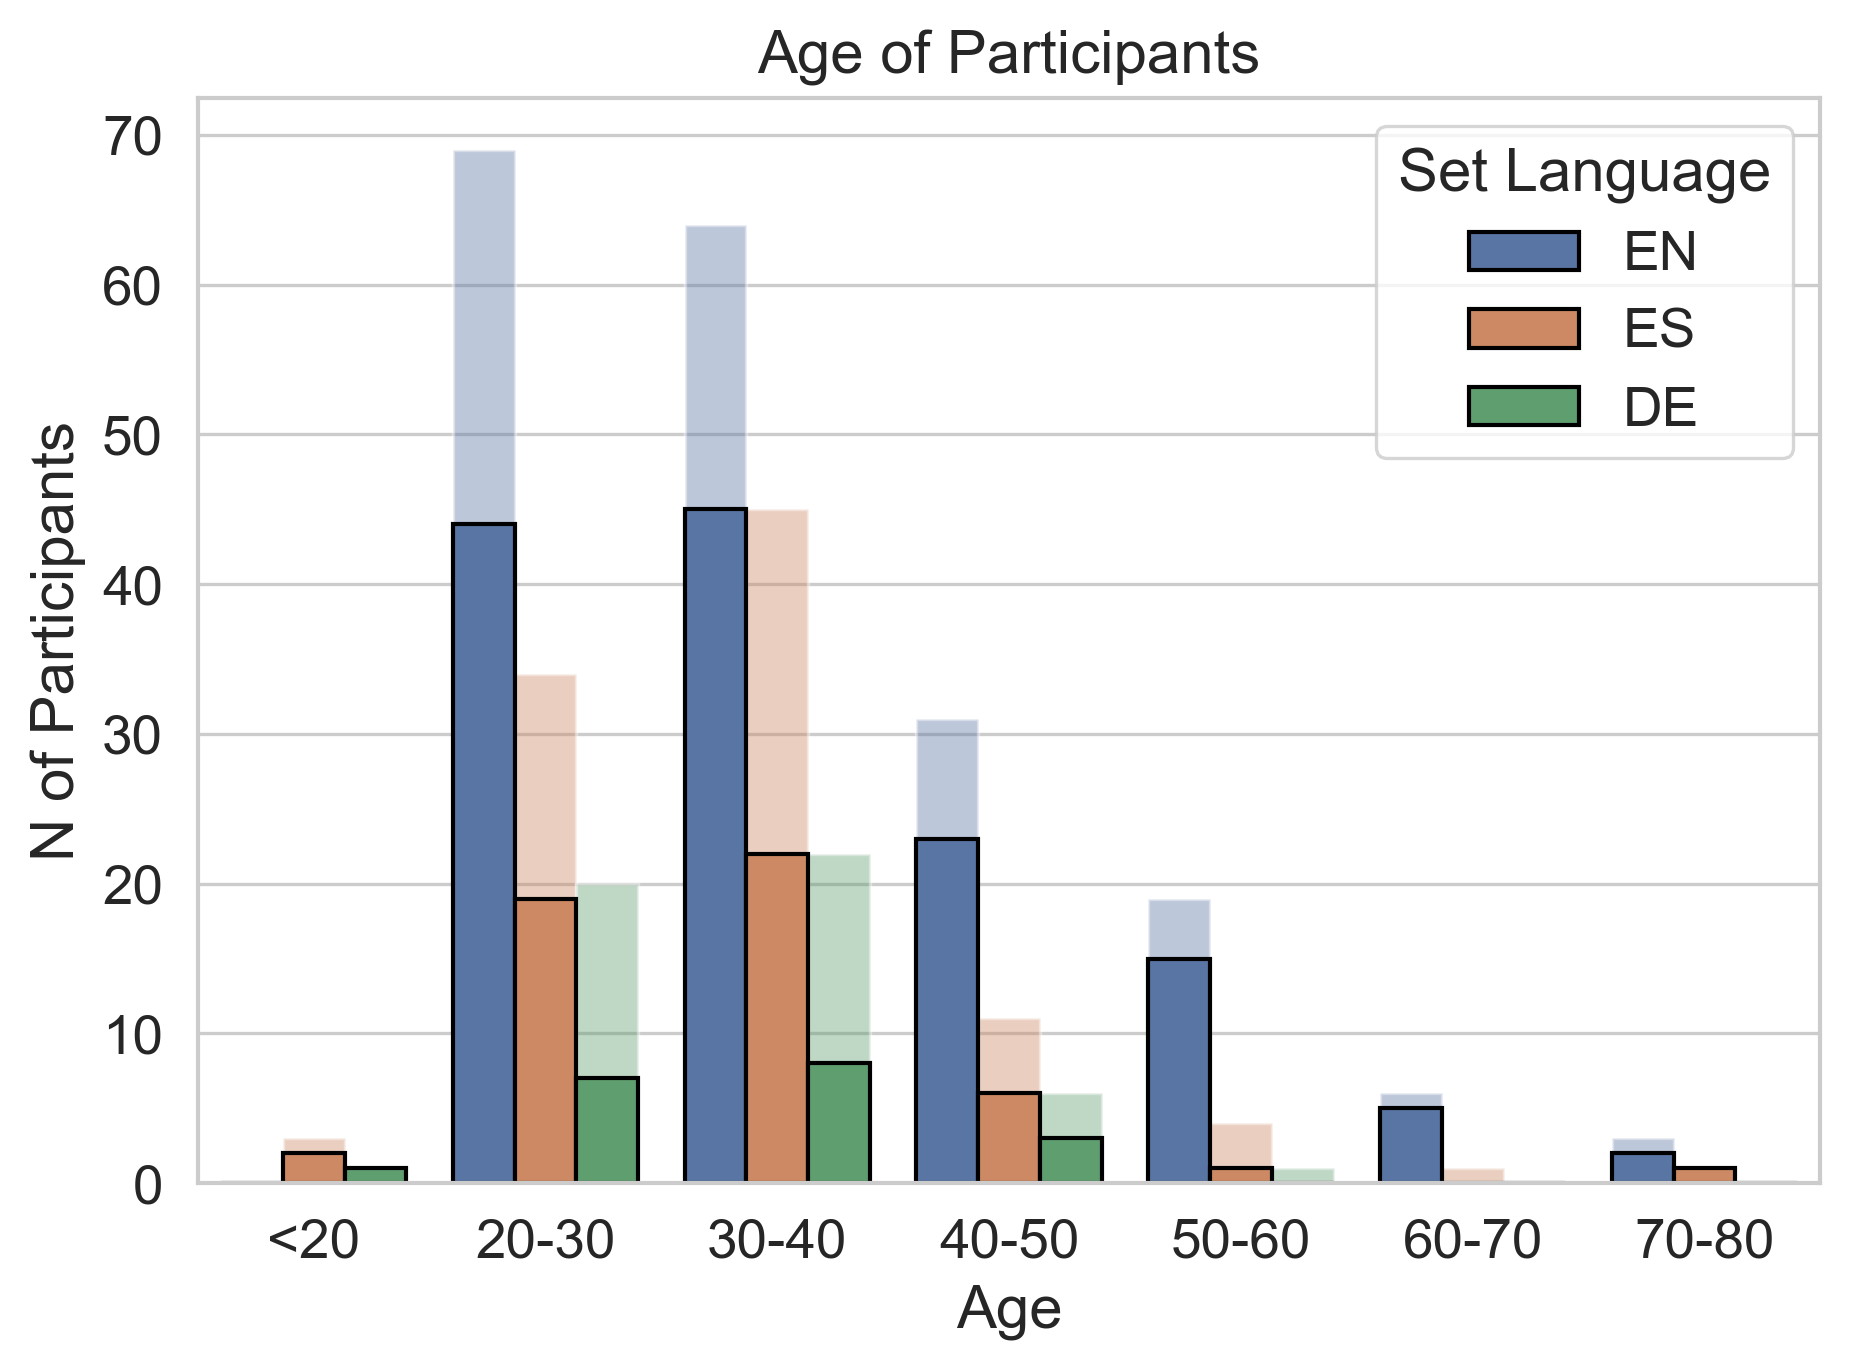

In [45]:
all_data_plot = sns.countplot(data=all_data_only_mturk, x="age_categories",
              hue="set_language", order=order_to_plot,alpha=0.4)
ax = sns.countplot(data=data_filtered, x="age_categories",
              hue="Set Language", order=order_to_plot, edgecolor="black", linewidth=1)

h,l = ax.get_legend_handles_labels()
plt.legend(h[3:6],l[3:6], title="Set Language")
sns.move_legend(ax, "upper right")
plt.title("Age of Participants")
plt.xlabel("Age")
plt.ylabel("N of Participants")
plt.tight_layout()

In [46]:
data_filtered.worker_age.describe()

count    204.000000
mean      35.151961
std       11.145321
min       19.000000
25%       27.000000
50%       32.500000
75%       40.000000
max       71.000000
Name: worker_age, dtype: float64

In [47]:
data_filtered[data_filtered.worker_fluency==2]

,worker_id,worker_age,worker_lang,worker_fluency,set_name,set_trials,target_error,screen_x,screen_y,webgazer_raw_data,...,question_9_time,question_9_answer,question_9_correct_flag,question_9_target_to_fixation_ratio,Set Language,fixation_error,participant_type,platform_type,vision,age_categories
579,p3,27,Chinese (Mandarin),2,mturk_EN_v02_lab_cognition,"[meco_para_3, a_Computationalcomplexitytheory_...",False,1440.0,900.0,"{""meco_para_3"": [[650, 465, 5], [634, 378, 38]...",...,9721.0,Dudley Simpson,1.0,0.0,EN,False,lab,cognition,glasses,20-30


In [48]:
data_filtered.total_correct_answers.value_counts()

total_correct_answers
7     60
6     48
5     37
8     35
9     18
10     6
Name: count, dtype: int64

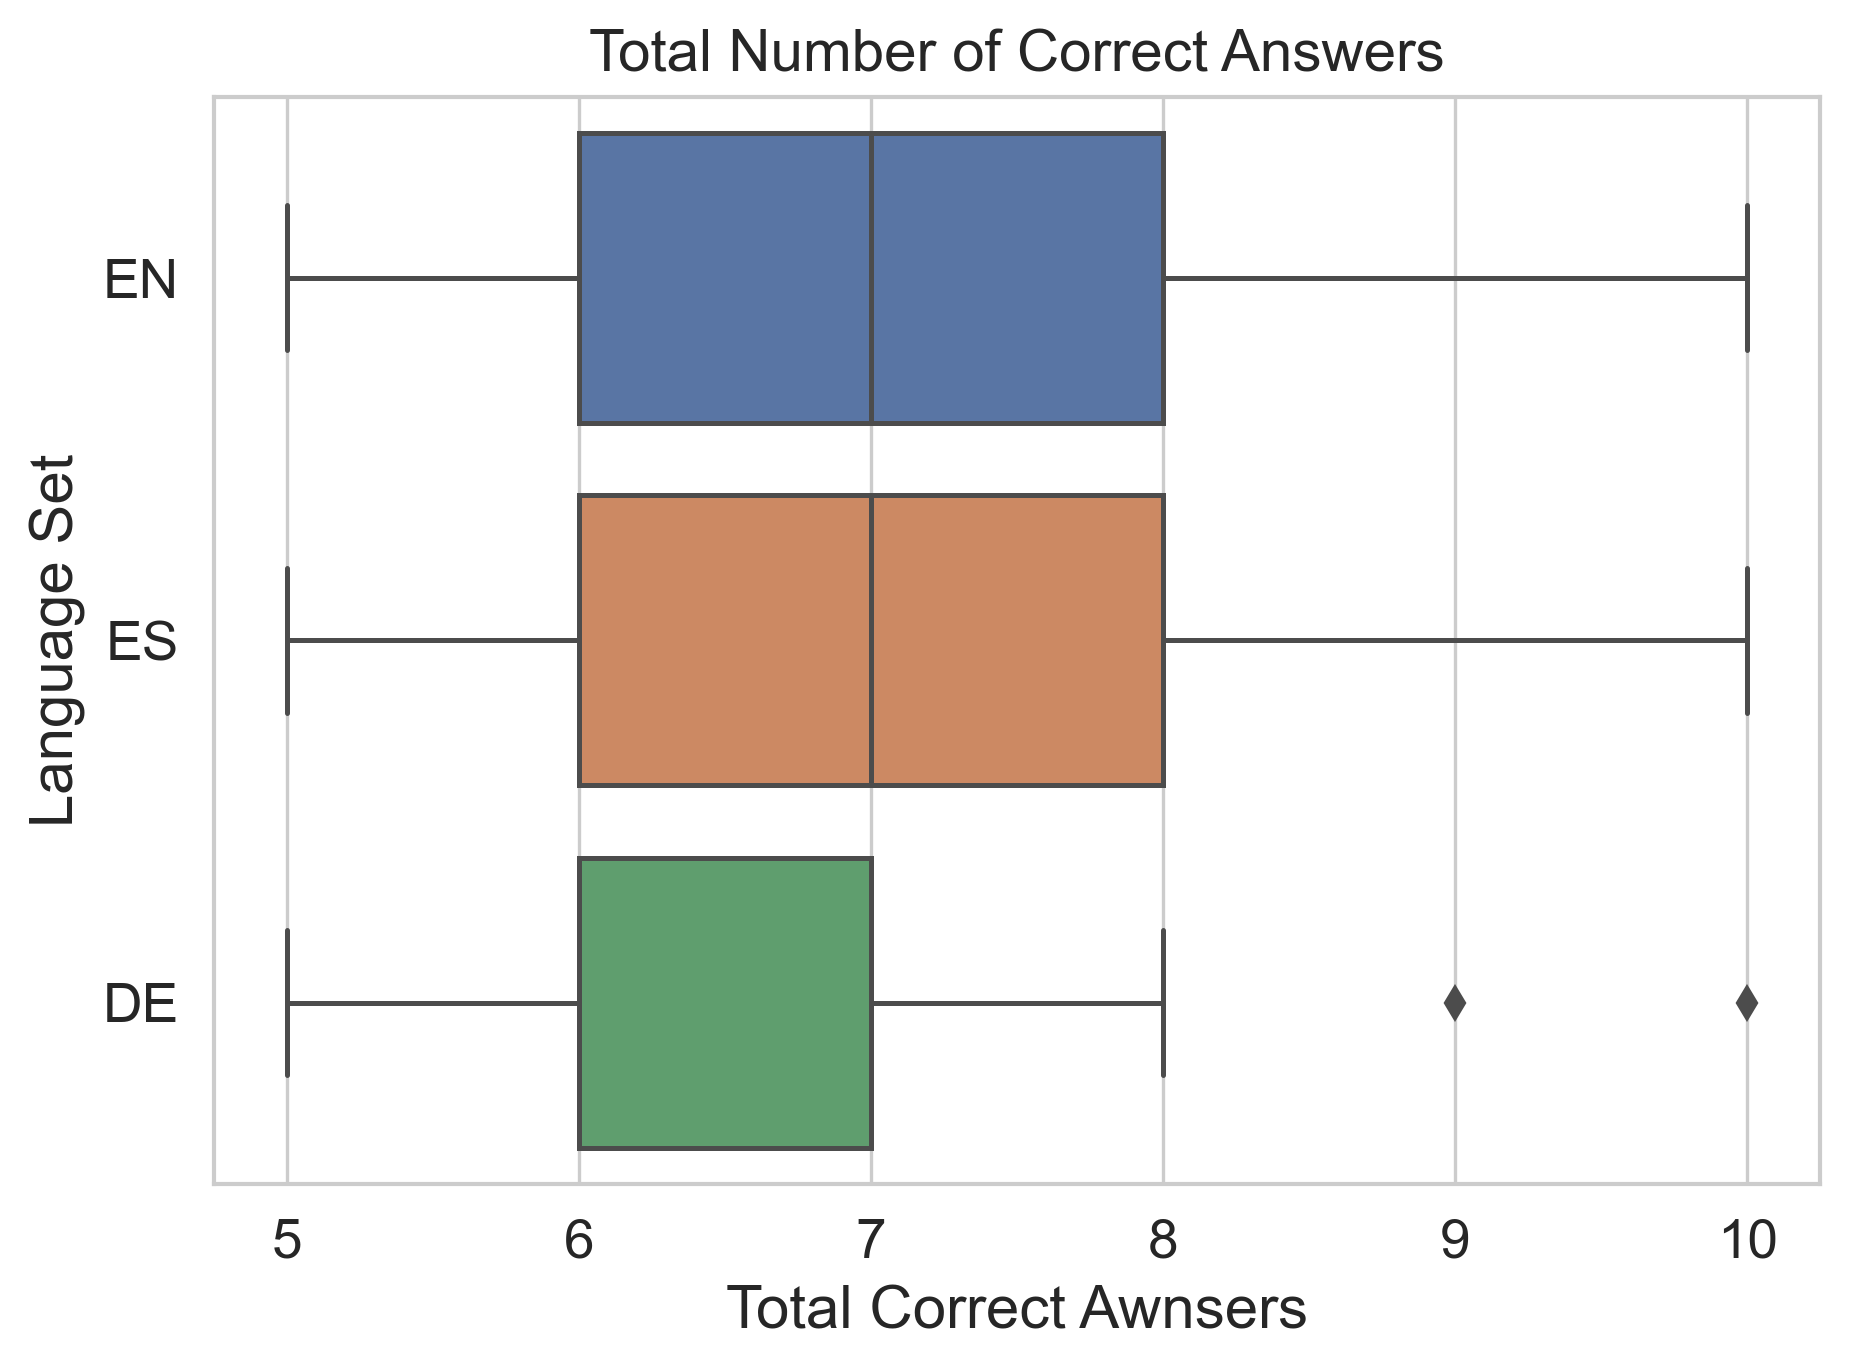

In [49]:
sns.boxplot(data=data_filtered, x="total_correct_answers", y="Set Language")
plt.title("Total Number of Correct Answers", size=14)
plt.xlabel("Total Correct Awnsers")
plt.ylabel("Language Set")
plt.tight_layout()

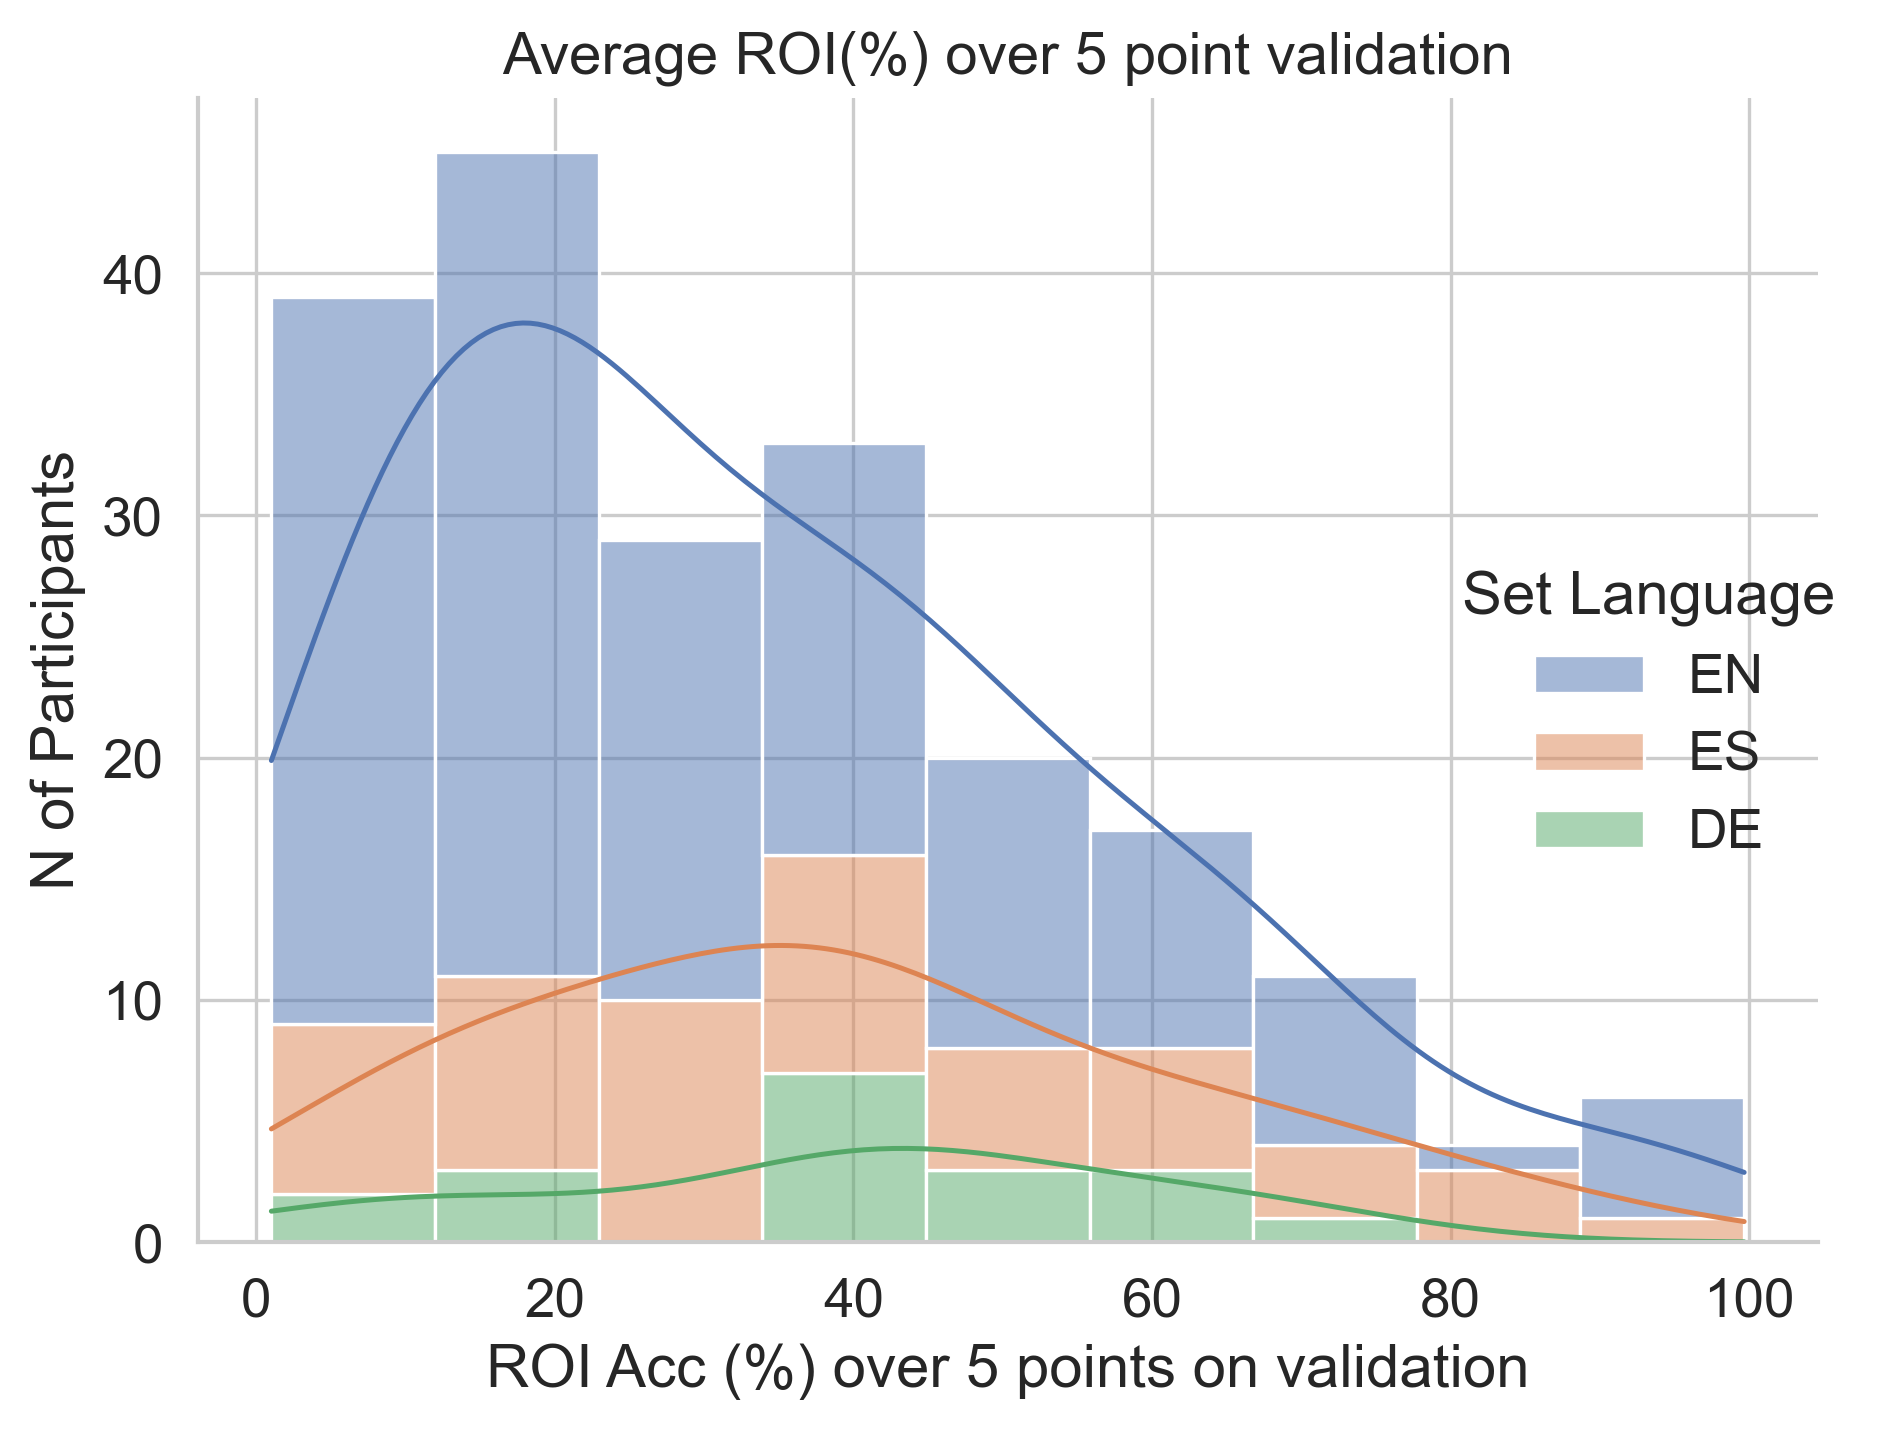

In [50]:
sns.displot(data=data_filtered, x="avg_roi_last_val", multiple="stack", hue="Set Language", kde=True)
plt.xlabel("ROI Acc (%) over 5 points on validation")
plt.title("Average ROI(%) over 5 point validation", size=14)
plt.ylabel("N of Participants")
plt.tight_layout()

In [51]:
data_filtered["avg_roi_last_val"].describe()

count    204.000000
mean      33.792200
std       23.258963
min        1.016949
25%       15.654137
50%       29.768079
75%       47.918531
max       99.661017
Name: avg_roi_last_val, dtype: float64

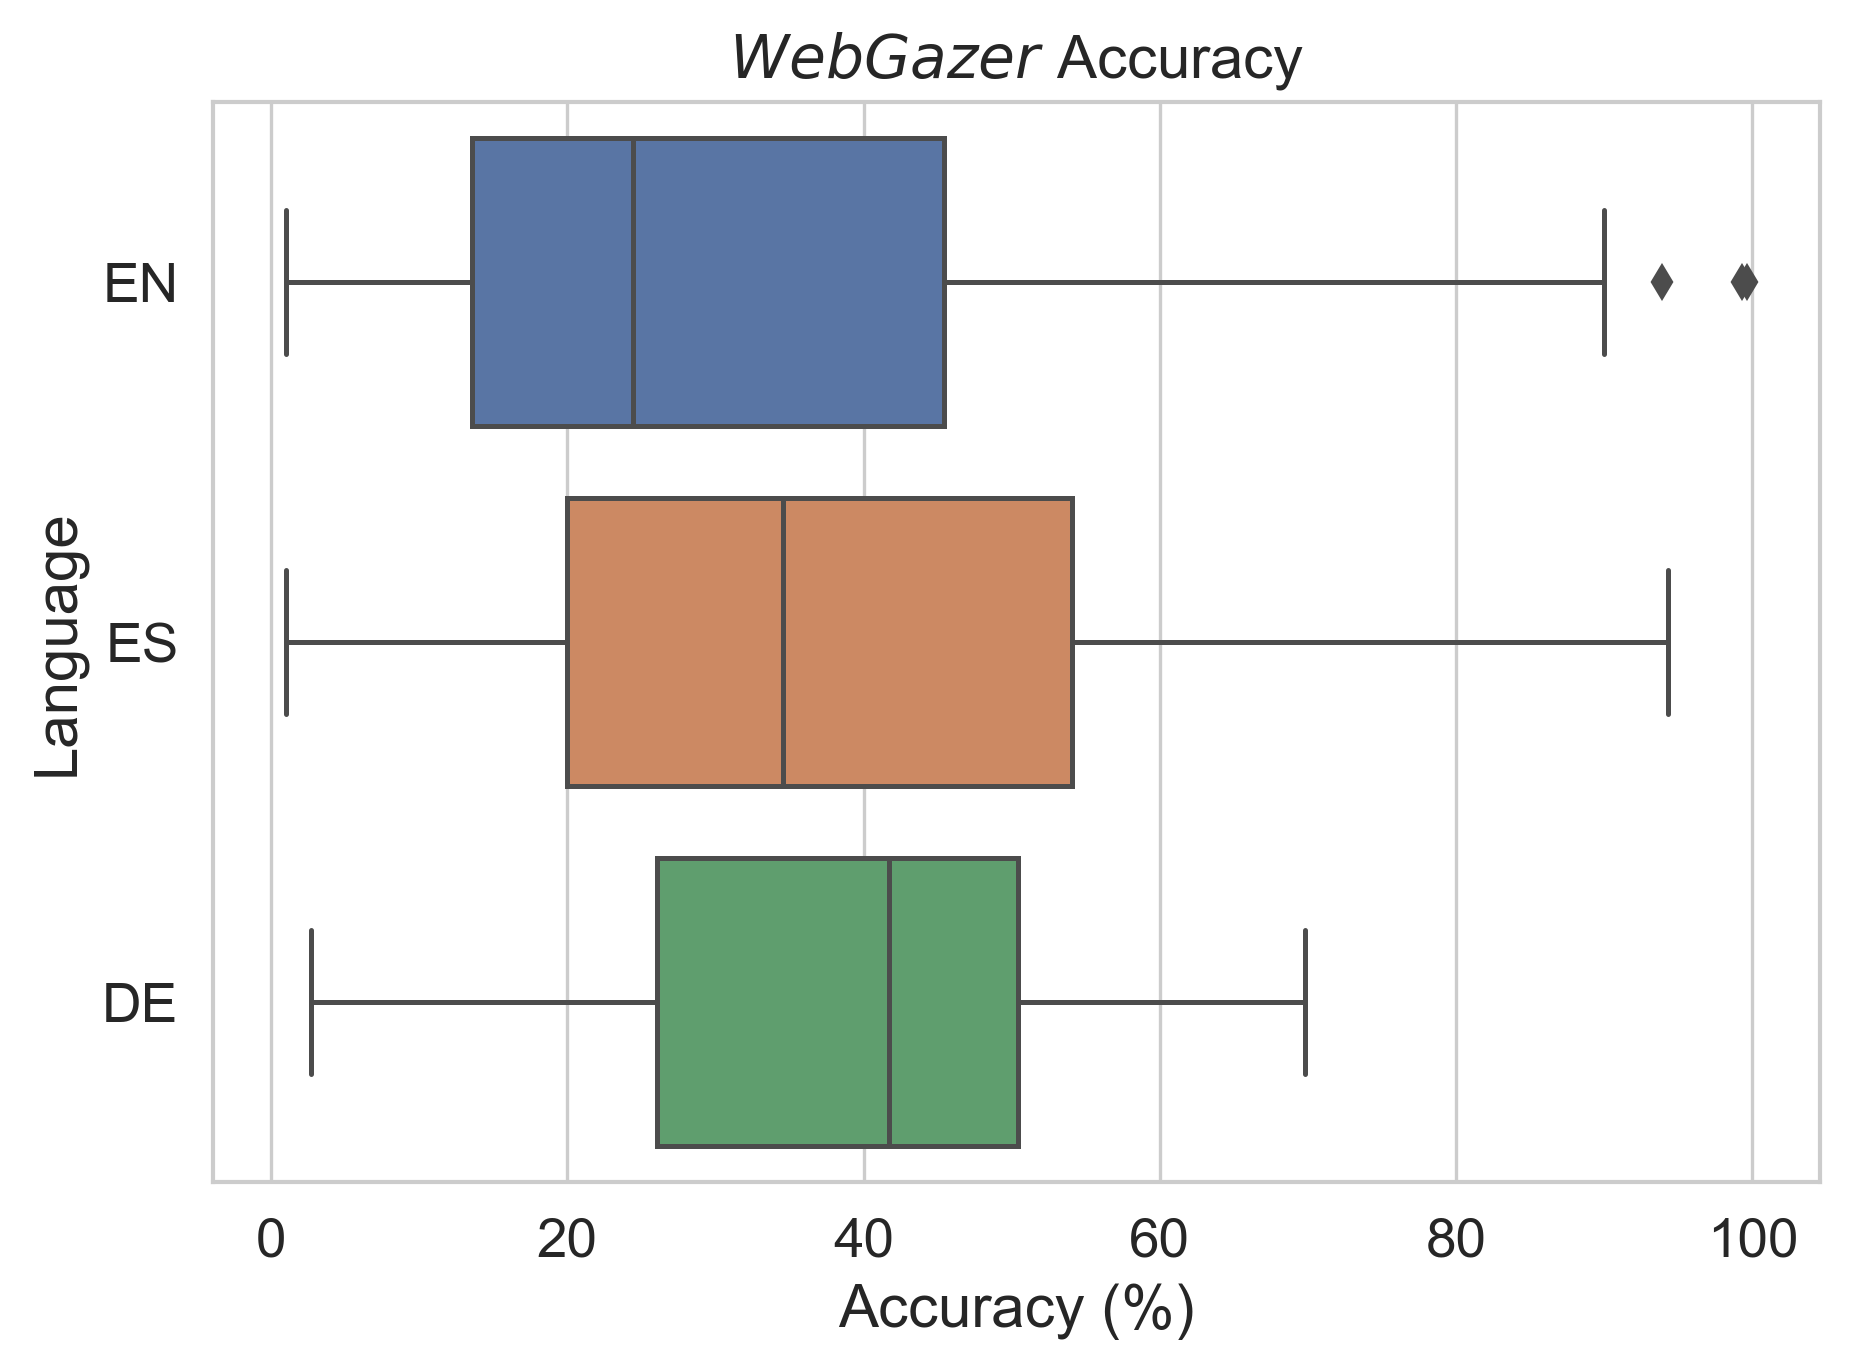

In [52]:
sns.boxplot(data=data_filtered, x="avg_roi_last_val", y="Set Language")
plt.title("$WebGazer$ Accuracy")
plt.xlabel("Accuracy (%)")
plt.ylabel("Language")
plt.tight_layout()

In [53]:
data_filtered["time_taken_min"] = data_filtered.exp_total_time*0.000016666
all_data["time_taken_min"] = np.abs(all_data.exp_total_time)*0.000016666

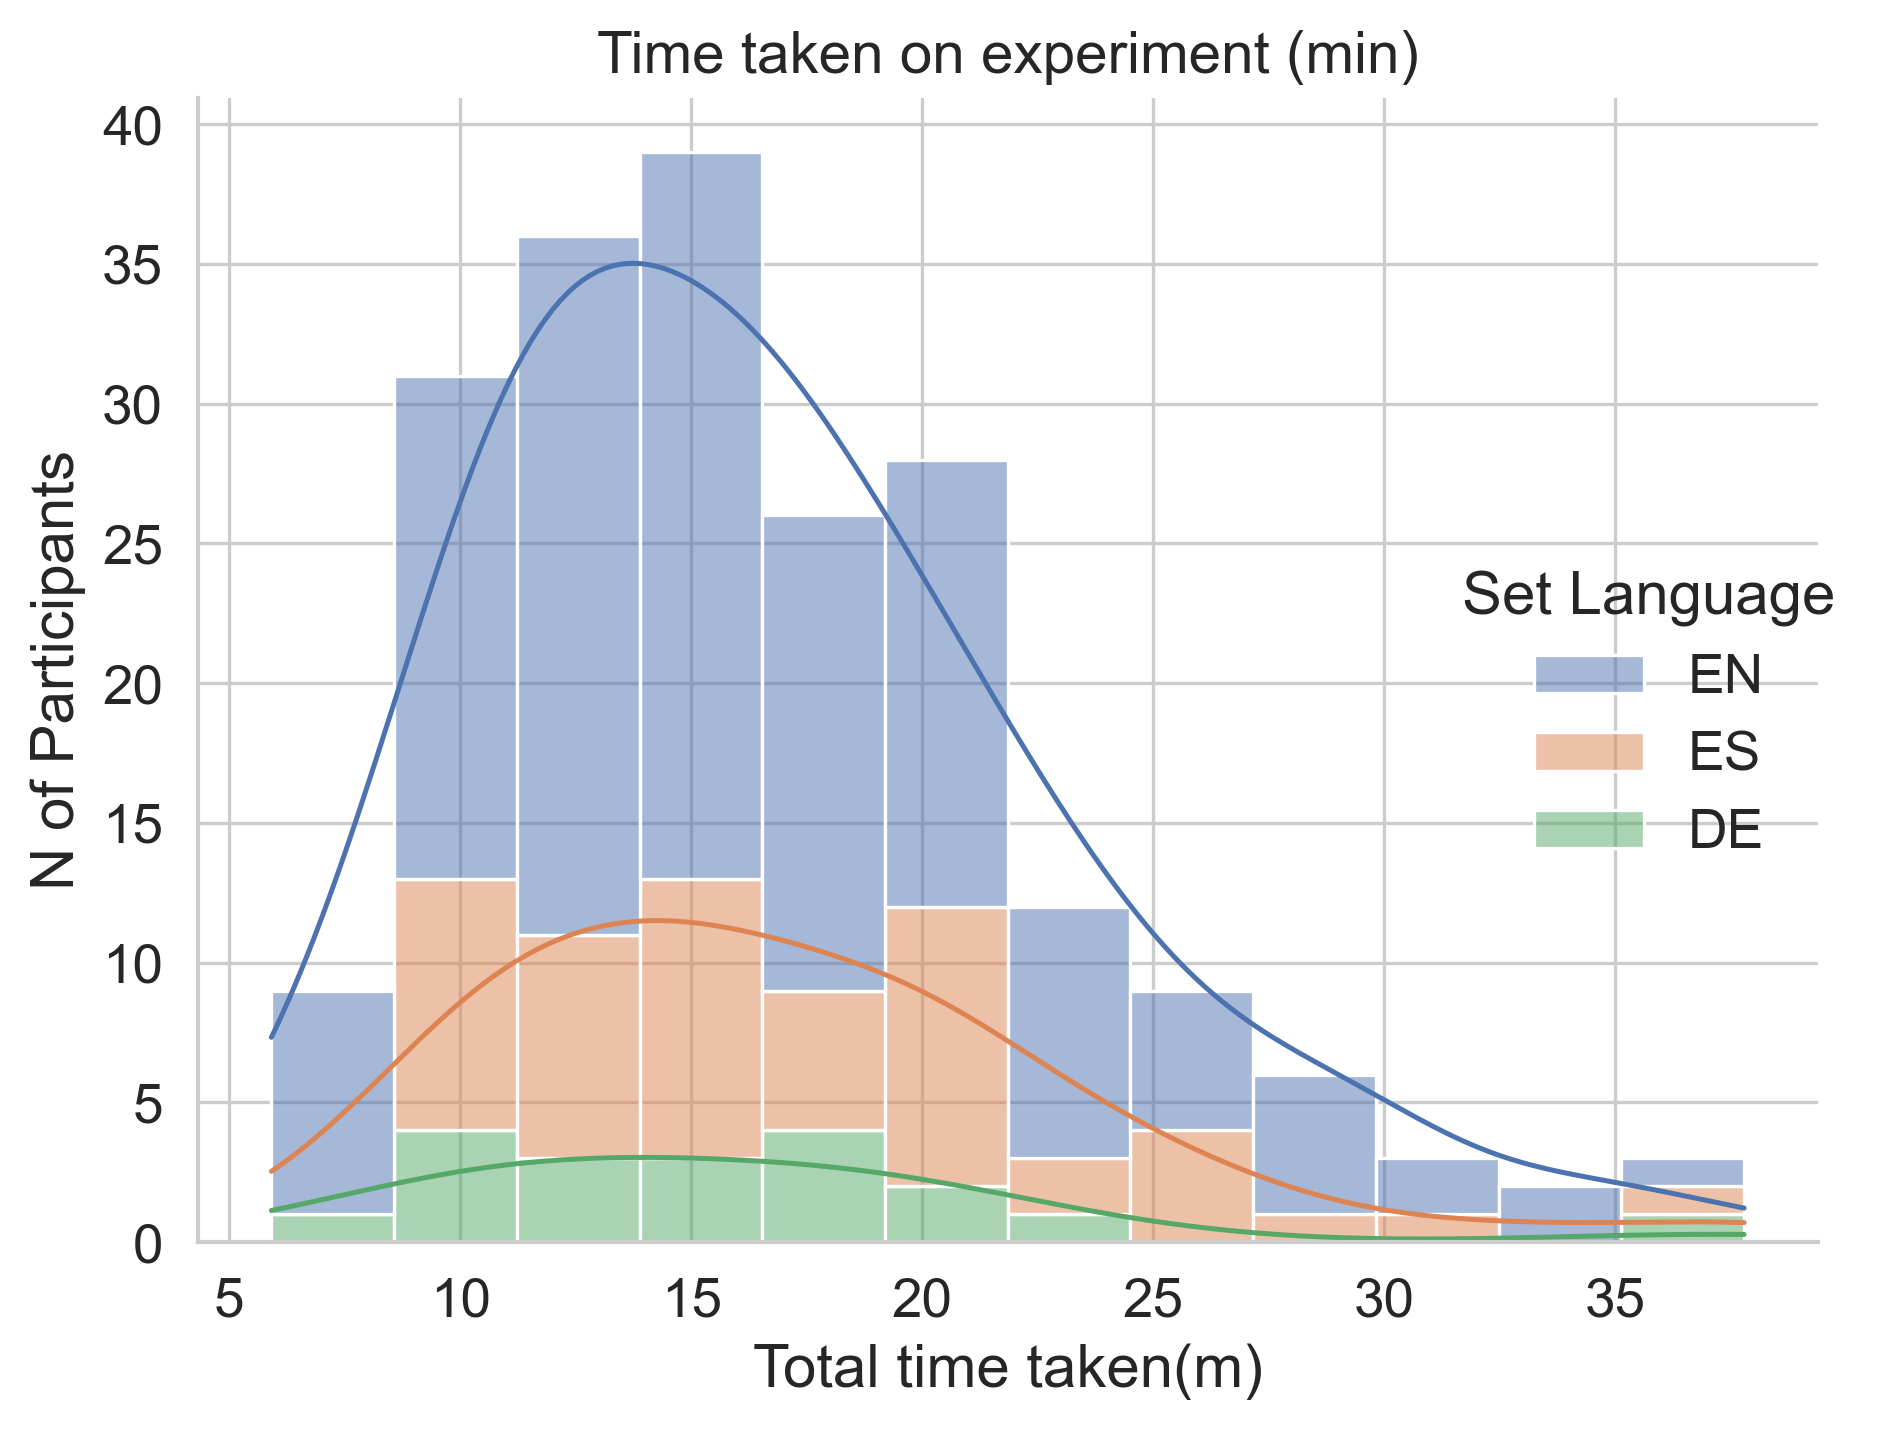

In [54]:
sns.displot(data=data_filtered, x="time_taken_min", multiple="stack", hue="Set Language", kde=True)
plt.title("Time taken on experiment (min)", size=14)
plt.xlabel("Total time taken(m)")
plt.ylabel("N of Participants")
plt.tight_layout()

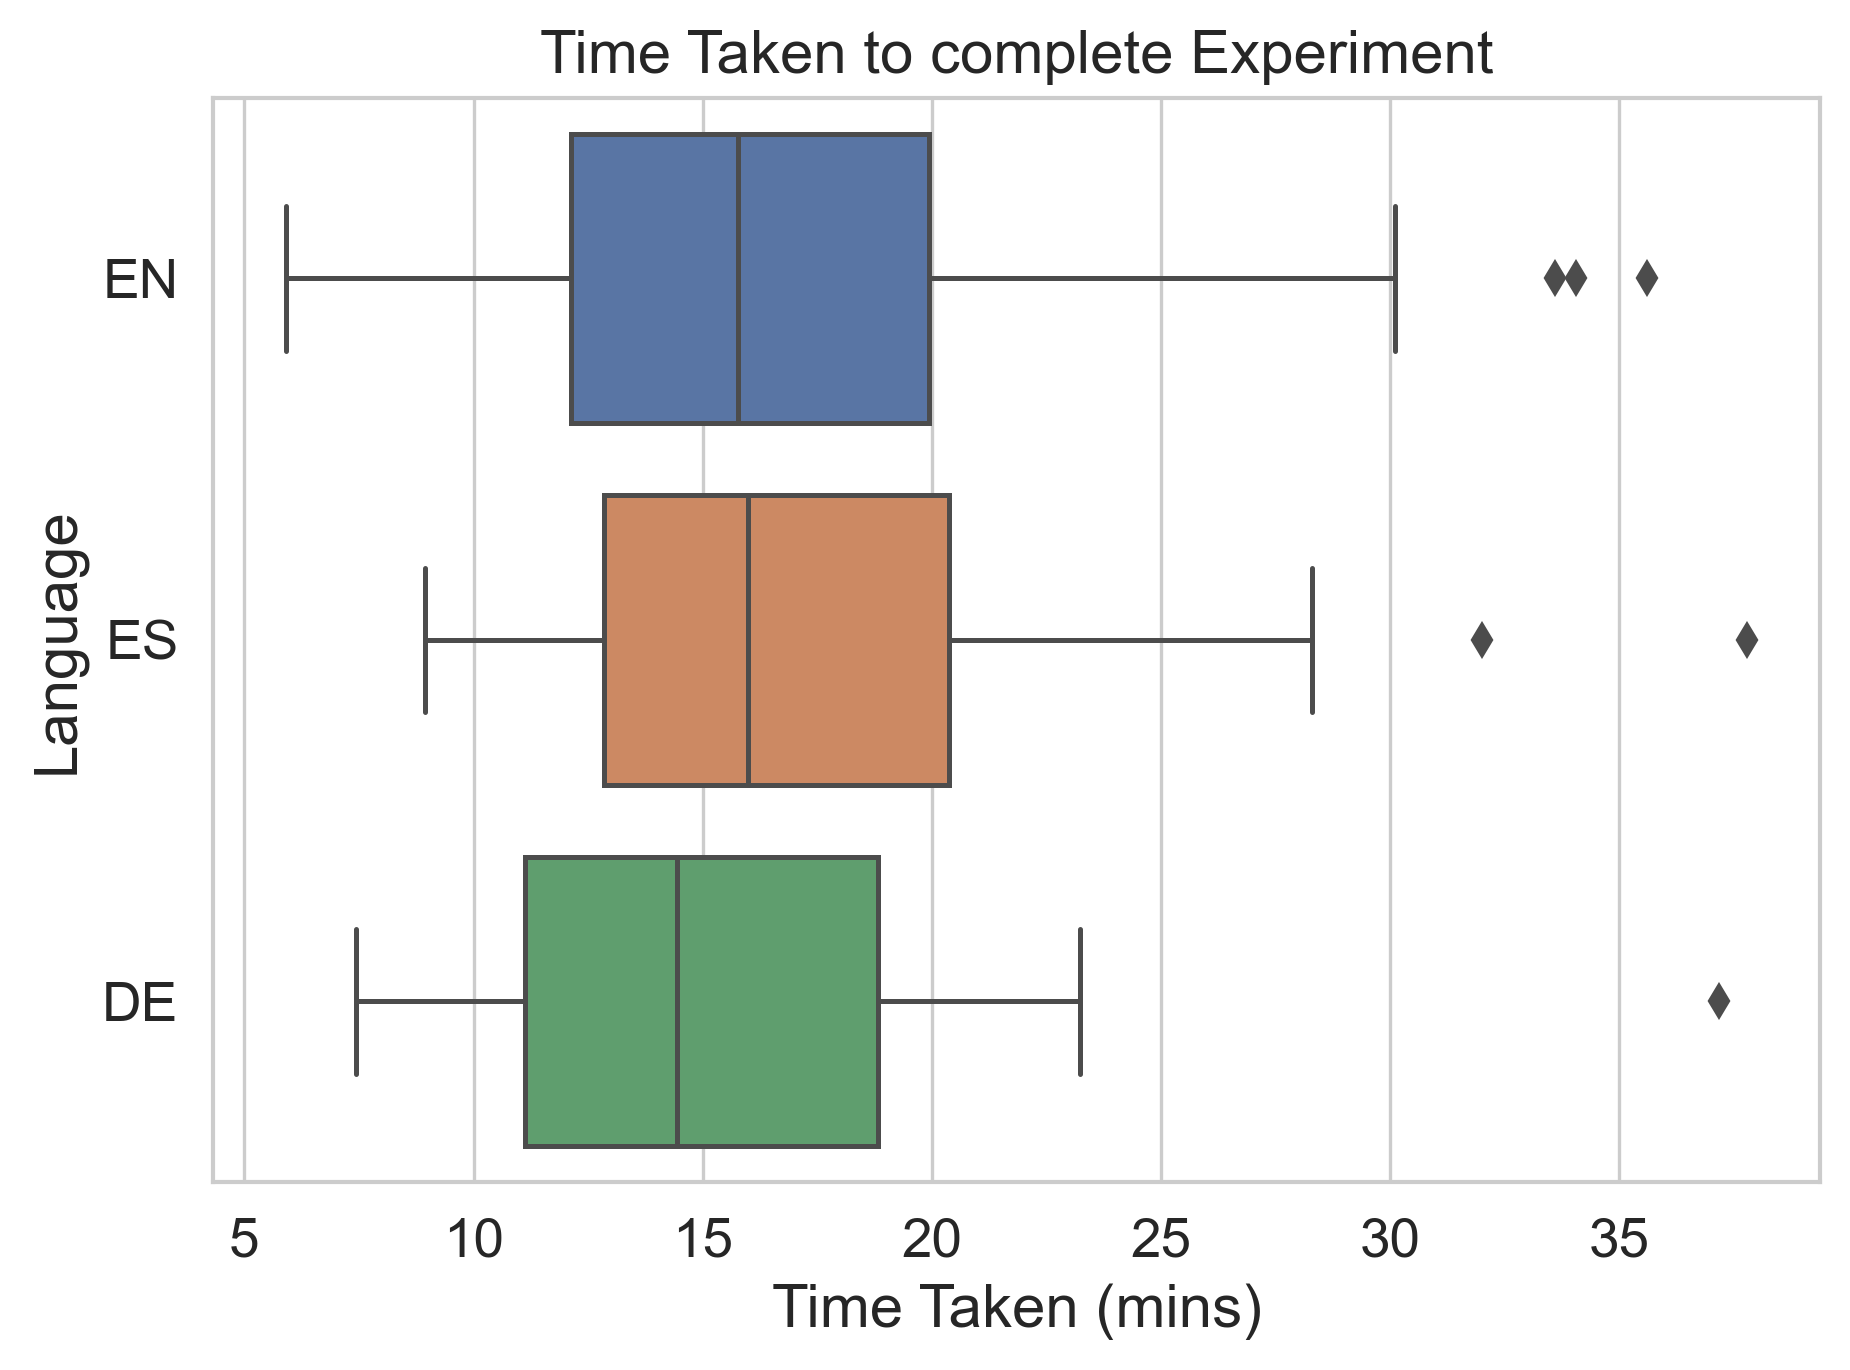

In [55]:
sns.boxplot(data=data_filtered, x="time_taken_min", y="Set Language")
plt.title("Time Taken to complete Experiment")
plt.xlabel("Time Taken (mins)")
plt.ylabel("Language")
plt.tight_layout()

In [56]:
sample_rate_bins = np.zeros(len(data_filtered),dtype="<U20")
order_to_plot = []
for i in range(0,30,5):
    mask = (data_filtered.webgazer_sample_rate >= i) & (data_filtered.webgazer_sample_rate < i+5)
    sample_rate_bins[mask] = f"{i}-{i+5}"
    order_to_plot.append(f"{i}-{i+5}")

In [57]:
sample_rate_bins_all_data = np.zeros(len(all_data_only_mturk),dtype="<U20")
for i in range(0,30,5):
    mask = (all_data_only_mturk.webgazer_sample_rate >= i) & (all_data_only_mturk.webgazer_sample_rate < i+5)
    sample_rate_bins_all_data[mask] = f"{i}-{i+5}"

In [58]:
sample_rate_bins

array(['15-20', '15-20', '25-30', '25-30', '25-30', '25-30', '25-30',
       '15-20', '15-20', '25-30', '25-30', '25-30', '20-25', '25-30',
       '20-25', '25-30', '10-15', '25-30', '25-30', '15-20', '25-30',
       '25-30', '20-25', '25-30', '20-25', '25-30', '15-20', '25-30',
       '25-30', '25-30', '15-20', '25-30', '25-30', '25-30', '25-30',
       '25-30', '25-30', '25-30', '25-30', '25-30', '25-30', '25-30',
       '20-25', '25-30', '25-30', '25-30', '15-20', '25-30', '25-30',
       '20-25', '15-20', '25-30', '25-30', '25-30', '10-15', '20-25',
       '20-25', '15-20', '25-30', '25-30', '25-30', '15-20', '10-15',
       '25-30', '25-30', '25-30', '25-30', '20-25', '25-30', '25-30',
       '25-30', '15-20', '20-25', '25-30', '25-30', '25-30', '25-30',
       '25-30', '20-25', '25-30', '25-30', '25-30', '25-30', '15-20',
       '25-30', '25-30', '20-25', '25-30', '25-30', '25-30', '10-15',
       '25-30', '10-15', '15-20', '25-30', '25-30', '25-30', '20-25',
       '25-30', '25-

In [59]:
data_filtered["sample_rate_bins"] = sample_rate_bins
all_data_only_mturk["sample_rate_bins"] = sample_rate_bins_all_data

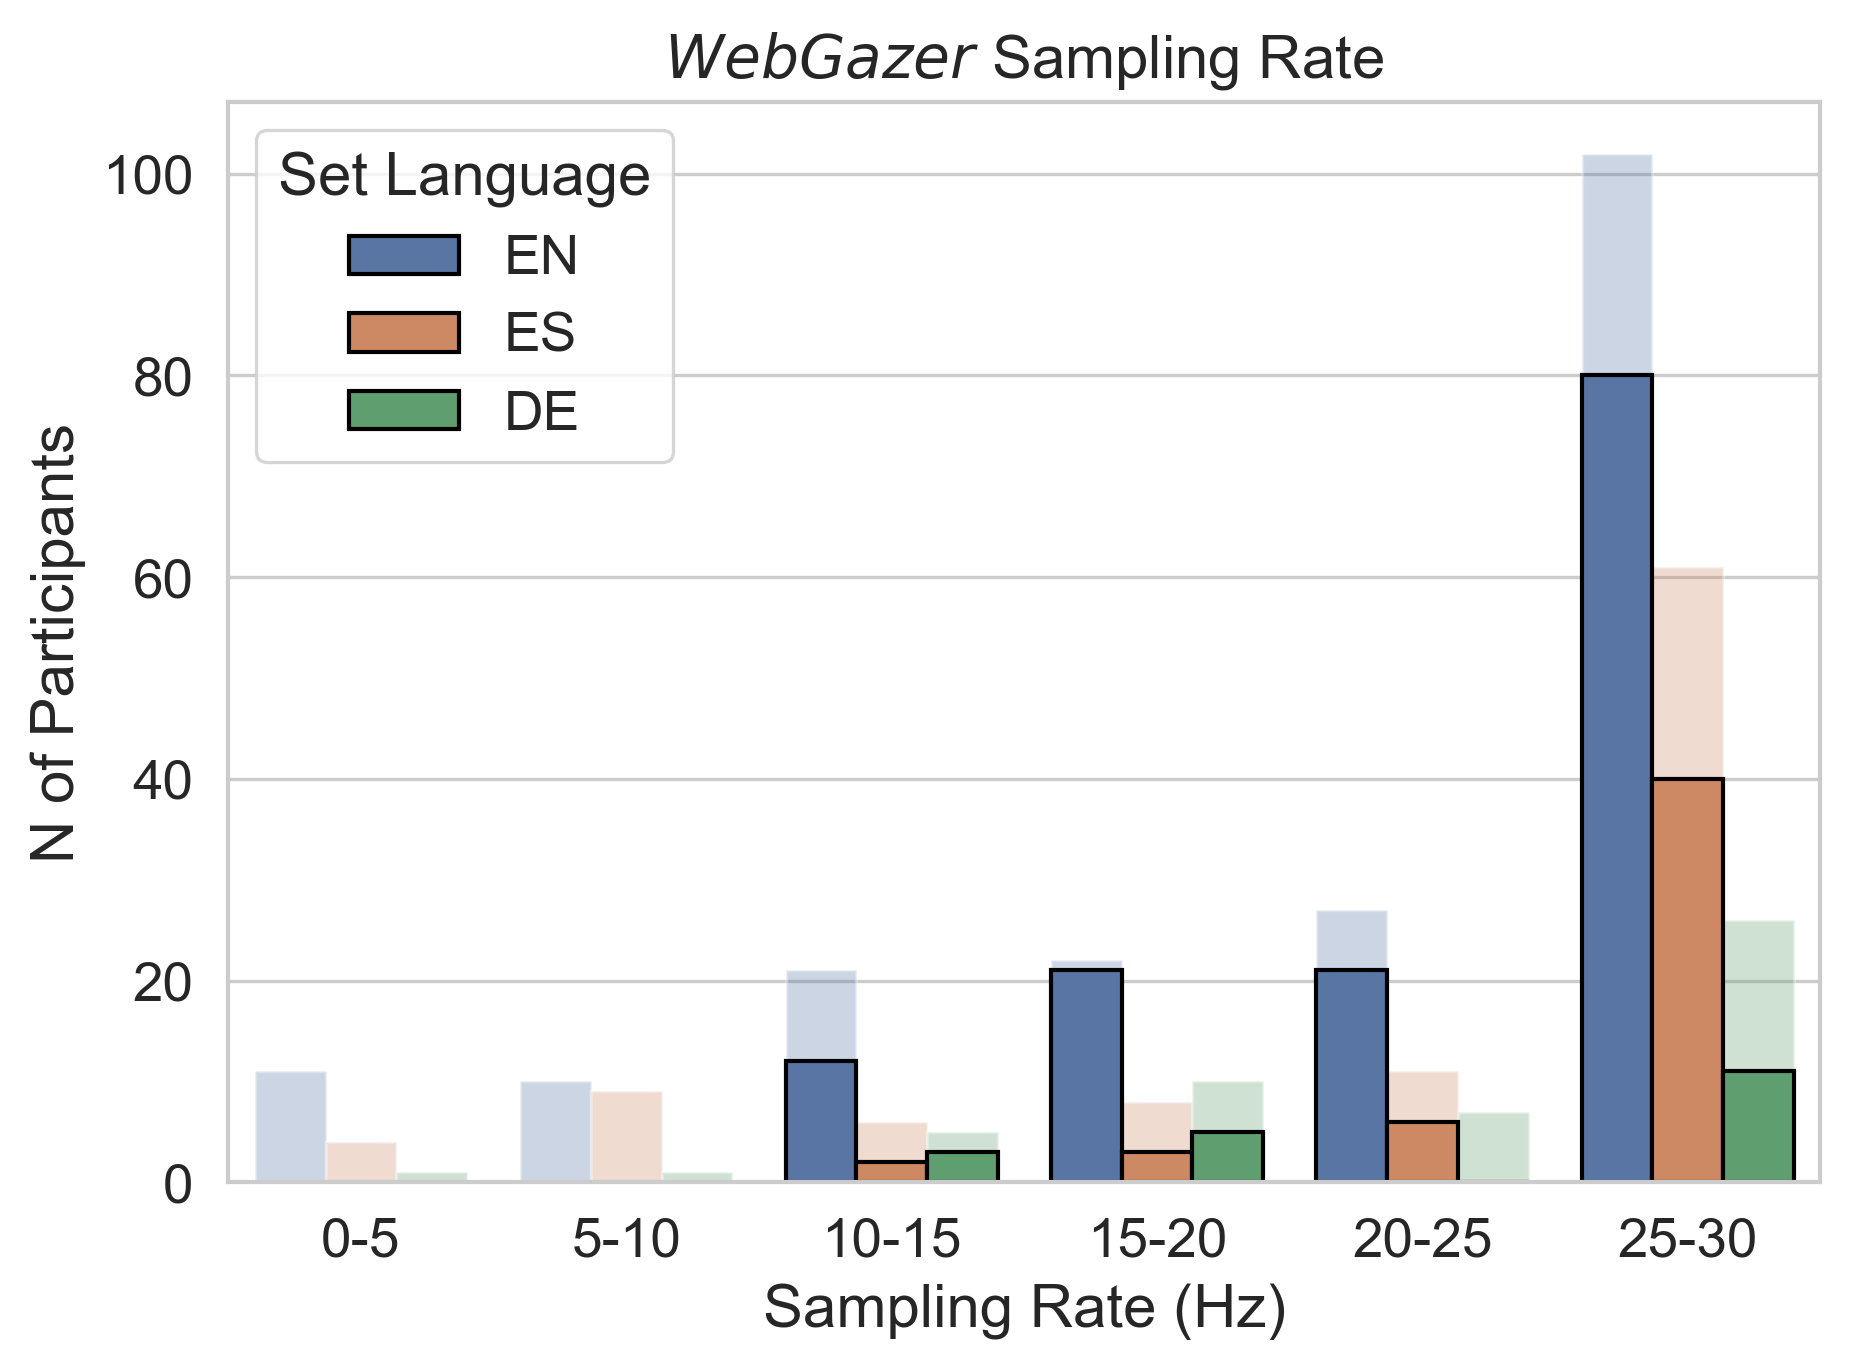

In [60]:
ax_all = sns.countplot(data=all_data_only_mturk, x="sample_rate_bins",
              hue="set_language", order=order_to_plot,alpha=0.3)
ax_all.get_legend().remove()
ax = sns.countplot(data=data_filtered, x="sample_rate_bins",
              hue="Set Language", order=order_to_plot,  edgecolor="black", linewidth=1)

h,l = ax.get_legend_handles_labels()
plt.legend(h[3:6],l[3:6], title="Set Language")
sns.move_legend(ax, "upper left")
plt.title("$WebGazer$ Sampling Rate")
plt.xlabel("Sampling Rate (Hz)")
plt.ylabel("N of Participants")
plt.tight_layout()
plt.show()

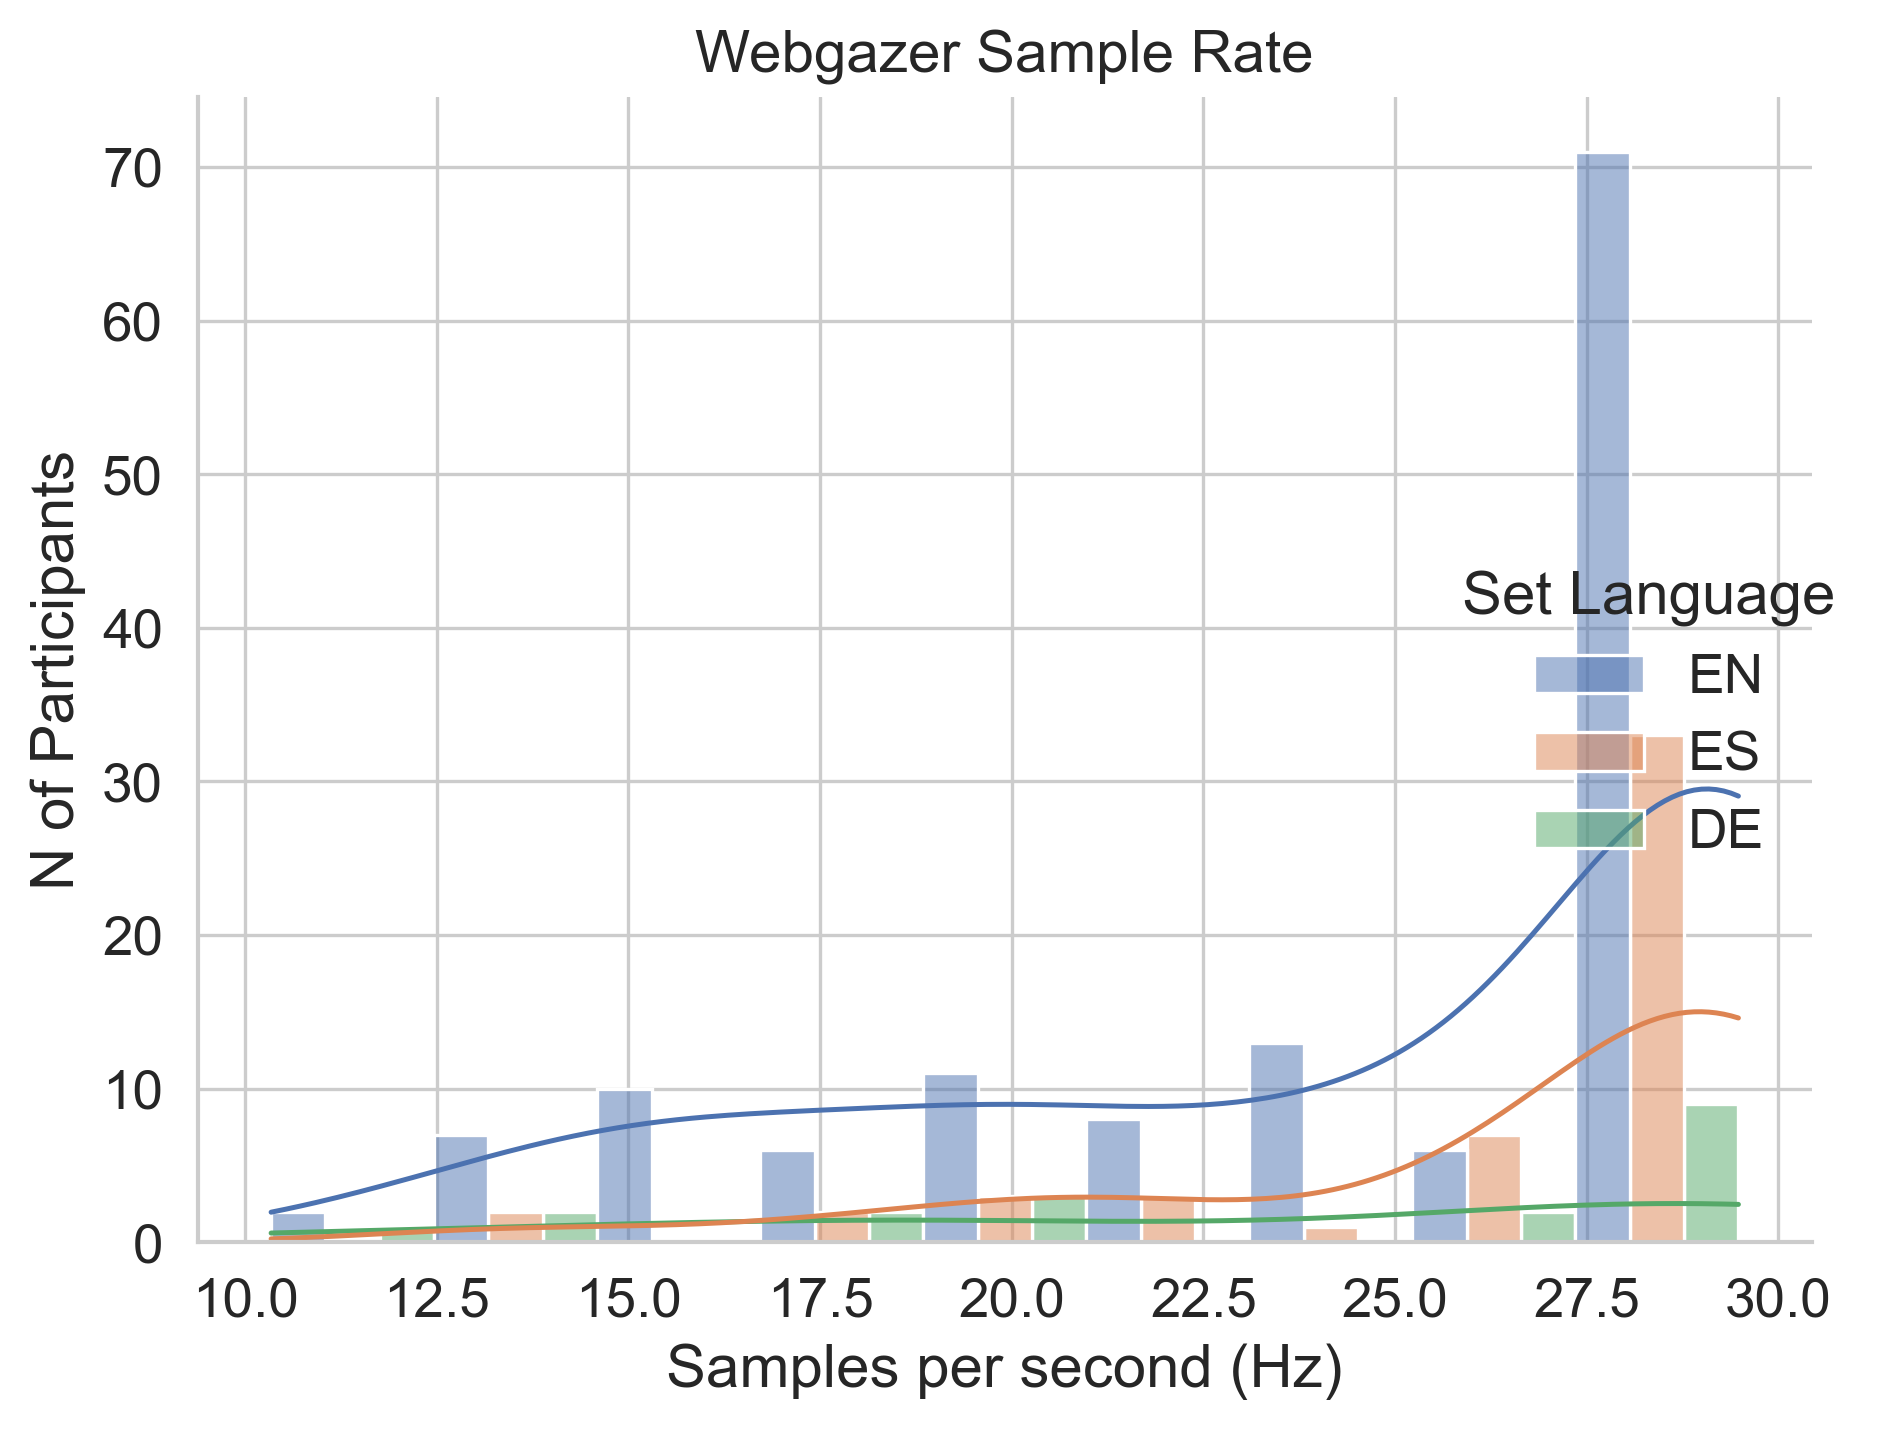

In [61]:
sns.displot(data=data_filtered, x="webgazer_sample_rate", multiple="dodge", hue="Set Language", kde=True)
plt.title("Webgazer Sample Rate", size=14)
plt.xlabel("Samples per second (Hz)")
plt.ylabel("N of Participants")
plt.tight_layout()

## Perform T-Tests:

In [62]:
from scipy.stats import ttest_ind, ttest_rel

In [63]:
# Filters to apply:
approved_only = (all_data.approved_flag > 0).to_numpy() 
no_fixation_error = (all_data.fixation_error == False).to_numpy()
no_target_error = (all_data.target_error == False).to_numpy()
sample_higher_10 = (all_data.webgazer_sample_rate > 10).to_numpy()
acc_higher = (all_data.avg_roi_last_val > 0).to_numpy()
filter_mturks = np.array([False if "link" in worker_id else True for worker_id in all_data["worker_id"]])
filter_sets = np.array([True if set_lang in ["EN","ES","DE"] else False for set_lang in all_data["set_language"]])
screen_x_above_1280 = (all_data.screen_x > 1110).to_numpy() # Some tolerance
screen_y_above_720 = (all_data.screen_y > 615).to_numpy() # Some Tolerance
screen_above_1280_720 = screen_x_above_1280 & screen_y_above_720

mask = approved_only & no_fixation_error & no_target_error & sample_higher_10 & screen_above_1280_720 & acc_higher & filter_mturks & filter_sets
data_filtered = all_data[mask].copy()
print("Before: ", all_data.shape, " After: ", data_filtered.shape)

Before:  (583, 154)  After:  (204, 154)


In [64]:
for col in data_filtered.columns:
    print(col)

worker_id
worker_age
worker_lang
worker_fluency
set_name
set_trials
target_error
screen_x
screen_y
webgazer_raw_data
webgazer_filtered_data
avg_roi_last_val
webgazer_sample_rate
exp_total_time
experiment_reload
questions_duplicated
approved_flag
total_correct_answers
trial_0_name
trial_0_condition
trial_0_time
trial_0_fixation_total
trial_0_fixation_text_TRT
trial_0_fixation_target_TRT
trial_0_fixation_on_target
question_0_name
question_0_time
question_0_answer
question_0_correct_flag
question_0_target_to_fixation_ratio
trial_1_name
trial_1_condition
trial_1_time
trial_1_fixation_total
trial_1_fixation_text_TRT
trial_1_fixation_target_TRT
trial_1_fixation_on_target
question_1_name
question_1_time
question_1_answer
question_1_correct_flag
question_1_target_to_fixation_ratio
trial_2_name
trial_2_condition
trial_2_time
trial_2_fixation_total
trial_2_fixation_text_TRT
trial_2_fixation_target_TRT
trial_2_fixation_on_target
question_2_name
question_2_time
question_2_answer
question_2_correct

In [65]:
def perform_t_test_ind(data, column="fixation_on_target"):
    # Columns used: 
    # - target_to_fixation_ratio
    # - fixation_on_target
    # - fixation_total
    # - ratio_TRT
    # - fixation_target_TRT
    # - fixation_text_TRT
    # - time
    # question_{i}_target_to_fixation_ratio
    
    normal_reading_group1 = []
    normal_reading_group2 = []
    if_seeking_group1 = []
    if_seeking_group2 = []
    if column == "ratio_TRT":
        for i in range(10):
            group1 = data[(data[f"question_{i}_correct_flag"]==0) & (data[f"trial_{i}_fixation_text_TRT"]) > 0]
            group2 = data[(data[f"question_{i}_correct_flag"]==1) & (data[f"trial_{i}_fixation_text_TRT"]) > 0]
            if i < 5:
                normal_reading_group1.extend(group1[f"trial_{i}_fixation_target_TRT"]/group1[f"trial_{i}_fixation_text_TRT"])
                normal_reading_group2.extend(group2[f"trial_{i}_fixation_target_TRT"]/group2[f"trial_{i}_fixation_text_TRT"])
            else:
                if_seeking_group1.extend(group1[f"trial_{i}_fixation_target_TRT"]/group1[f"trial_{i}_fixation_text_TRT"])
                if_seeking_group2.extend(group2[f"trial_{i}_fixation_target_TRT"]/group2[f"trial_{i}_fixation_text_TRT"])
    else:
        for i in range(10):
            group1 = data[data[f"question_{i}_correct_flag"]==0]
            group2 = data[data[f"question_{i}_correct_flag"]==1]
            if i < 5:
                if column == "target_to_fixation_ratio":
                    normal_reading_group1.extend(group1[f"question_{i}_{column}"])
                    normal_reading_group2.extend(group2[f"question_{i}_{column}"])
                else:
                    normal_reading_group1.extend(group1[f"trial_{i}_{column}"])
                    normal_reading_group2.extend(group2[f"trial_{i}_{column}"])
            else:
                if column == "target_to_fixation_ratio":
                    if_seeking_group1.extend(group1[f"question_{i}_{column}"])
                    if_seeking_group2.extend(group2[f"question_{i}_{column}"])
                else:
                    if_seeking_group1.extend(group1[f"trial_{i}_{column}"])
                    if_seeking_group2.extend(group2[f"trial_{i}_{column}"])
    
    print("Results for: ", column)
    print("## NR: Wrong N: ", len(normal_reading_group1), "Correct N: ", len(normal_reading_group2), "Total: ", len(normal_reading_group2)+len(normal_reading_group1))
    print("## NR Average Wrong Group:", np.array(normal_reading_group1).mean()," | Average Correct Group: ", np.array(normal_reading_group2).mean())
    print("## IS: Wrong N: ", len(if_seeking_group1), "Correct N: ", len(if_seeking_group2), "Total: ", len(if_seeking_group2)+len(if_seeking_group1))
    print("## IS Average Wrong Group:", np.array(if_seeking_group1).mean()," | Average Correct Group: ", np.array(if_seeking_group2).mean())
    print()
    nr_t_stat, nr_t_p = ttest_ind(normal_reading_group1, normal_reading_group2)
    is_t_stat, is_t_p = ttest_ind(if_seeking_group1, if_seeking_group2)
    print(f"{column} T-Test, Normal Reading :: T-Stat:{nr_t_stat:.2f}, p-value:{nr_t_p:.2f} ({nr_t_p})")
    print(f"{column}, Information Seeking Reading :: T-Stat:{is_t_stat:.2f}, p-value:{is_t_p:.2f} ({is_t_p})")
    print("------")

In [66]:
def perform_t_test_paired(data, column="fixation_on_target"):
    # Columns used: 
    # - target_to_fixation_ratio
    # - fixation_on_target
    # - fixation_total
    # - ratio_TRT
    # - fixation_target_TRT
    # - fixation_text_TRT
    # - time
    # question_{i}_target_to_fixation_ratio
    
    normal_reading_group1 = []
    if_seeking_group2 = []
    if column == "ratio_TRT":
        #print("This test can't be performed due to some texts missing text_TRT")
        #return
        workers_with_no_text_TRT = set()
        for row_i, row in data.iterrows():
            for i in range(10):
                if row[f"trial_{i}_fixation_text_TRT"] == 0:
                    workers_with_no_text_TRT.add(row["worker_id"])
                    break
        filter = [False if worker_id in workers_with_no_text_TRT else True for worker_id in data.worker_id]
        data_with_text_trt = data[filter]
        for i in range(10):
            if i < 5:
                normal_reading_group1.extend(data_with_text_trt[f"trial_{i}_fixation_target_TRT"]/data_with_text_trt[f"trial_{i}_fixation_text_TRT"])
            else:
                if_seeking_group2.extend(data_with_text_trt[f"trial_{i}_fixation_target_TRT"]/data_with_text_trt[f"trial_{i}_fixation_text_TRT"])
    else:
        for i in range(10):
            if i < 5:
                if column == "target_to_fixation_ratio":
                    normal_reading_group1.extend(data[f"question_{i}_{column}"])
                else:
                    normal_reading_group1.extend(data[f"trial_{i}_{column}"])
            else:
                if column == "target_to_fixation_ratio":
                    if_seeking_group2.extend(data[f"question_{i}_{column}"])
                else:
                    if_seeking_group2.extend(data[f"trial_{i}_{column}"])
    
    print("Results for: ", column)
    print("## NR N: ", len(normal_reading_group1), "IS N: ", len(if_seeking_group2), "Total: ", len(if_seeking_group2)+len(normal_reading_group1))
    print(f"{column} Paired T-Test Different Tasks: ", ttest_rel(normal_reading_group1, if_seeking_group2))
    print()

In [67]:
tests_to_perform = ["fixation_on_target", "fixation_total", "target_to_fixation_ratio", "fixation_text_TRT","fixation_target_TRT","ratio_TRT","time"]

In [68]:
for test in tests_to_perform:
    perform_t_test_paired(data_filtered, test)

Results for:  fixation_on_target
## NR N:  1020 IS N:  1020 Total:  2040
fixation_on_target Paired T-Test Different Tasks:  TtestResult(statistic=4.130323594862421, pvalue=3.919336053229693e-05, df=1019)

Results for:  fixation_total
## NR N:  1020 IS N:  1020 Total:  2040
fixation_total Paired T-Test Different Tasks:  TtestResult(statistic=13.729260681480815, pvalue=1.7513665767588294e-39, df=1019)

Results for:  target_to_fixation_ratio
## NR N:  1020 IS N:  1020 Total:  2040
target_to_fixation_ratio Paired T-Test Different Tasks:  TtestResult(statistic=-0.6748080394519647, pvalue=0.49995080483511867, df=1019)

Results for:  fixation_text_TRT
## NR N:  1020 IS N:  1020 Total:  2040
fixation_text_TRT Paired T-Test Different Tasks:  TtestResult(statistic=17.168905963982436, pvalue=3.1602677691446853e-58, df=1019)

Results for:  fixation_target_TRT
## NR N:  1020 IS N:  1020 Total:  2040
fixation_target_TRT Paired T-Test Different Tasks:  TtestResult(statistic=5.0439029792777745, pvalue

In [69]:
for test in tests_to_perform:
    perform_t_test_ind(data_filtered, test)

Results for:  fixation_on_target
## NR: Wrong N:  453 Correct N:  567 Total:  1020
## NR Average Wrong Group: 13.311258278145695  | Average Correct Group:  13.38447971781305
## IS: Wrong N:  192 Correct N:  828 Total:  1020
## IS Average Wrong Group: 11.114583333333334  | Average Correct Group:  8.415458937198068

fixation_on_target T-Test, Normal Reading :: T-Stat:-0.04, p-value:0.97 (0.9686815253323584)
fixation_on_target, Information Seeking Reading :: T-Stat:1.50, p-value:0.13 (0.13383811057536465)
------
Results for:  fixation_total
## NR: Wrong N:  453 Correct N:  567 Total:  1020
## NR Average Wrong Group: 196.05077262693158  | Average Correct Group:  208.02645502645504
## IS: Wrong N:  192 Correct N:  828 Total:  1020
## IS Average Wrong Group: 136.3125  | Average Correct Group:  110.68236714975845

fixation_total T-Test, Normal Reading :: T-Stat:-0.93, p-value:0.35 (0.35379839622139486)
fixation_total, Information Seeking Reading :: T-Stat:2.35, p-value:0.02 (0.019102226204421

In [70]:
for test in tests_to_perform:
    perform_t_test_ind(data_filtered, test)

Results for:  fixation_on_target
## NR: Wrong N:  453 Correct N:  567 Total:  1020
## NR Average Wrong Group: 13.311258278145695  | Average Correct Group:  13.38447971781305
## IS: Wrong N:  192 Correct N:  828 Total:  1020
## IS Average Wrong Group: 11.114583333333334  | Average Correct Group:  8.415458937198068

fixation_on_target T-Test, Normal Reading :: T-Stat:-0.04, p-value:0.97 (0.9686815253323584)
fixation_on_target, Information Seeking Reading :: T-Stat:1.50, p-value:0.13 (0.13383811057536465)
------
Results for:  fixation_total
## NR: Wrong N:  453 Correct N:  567 Total:  1020
## NR Average Wrong Group: 196.05077262693158  | Average Correct Group:  208.02645502645504
## IS: Wrong N:  192 Correct N:  828 Total:  1020
## IS Average Wrong Group: 136.3125  | Average Correct Group:  110.68236714975845

fixation_total T-Test, Normal Reading :: T-Stat:-0.93, p-value:0.35 (0.35379839622139486)
fixation_total, Information Seeking Reading :: T-Stat:2.35, p-value:0.02 (0.019102226204421

## Calculating Text statistics

Average Words per text, sent length. Using scipy.

**To do:** Implement the features for RU, GR, TR

In [71]:
import os
os.listdir(os.path.join("experiment_data","set_texts"))

['text_settings_mturk_DE_v01.csv',
 'text_settings_mturk_DE_v02.csv',
 'text_settings_mturk_DE_v03.csv',
 'text_settings_mturk_DE_v04.csv',
 'text_settings_mturk_DE_v05.csv',
 'text_settings_mturk_EN_v01.csv',
 'text_settings_mturk_EN_v02.csv',
 'text_settings_mturk_EN_v03.csv',
 'text_settings_mturk_EN_v04.csv',
 'text_settings_mturk_EN_v05.csv',
 'text_settings_mturk_EN_v06.csv',
 'text_settings_mturk_EN_v07.csv',
 'text_settings_mturk_EN_v08.csv',
 'text_settings_mturk_EN_v09.csv',
 'text_settings_mturk_EN_v10.csv',
 'text_settings_mturk_EN_v11.csv',
 'text_settings_mturk_EN_v12.csv',
 'text_settings_mturk_EN_v13.csv',
 'text_settings_mturk_EN_v14.csv',
 'text_settings_mturk_EN_v15.csv',
 'text_settings_mturk_EN_v16.csv',
 'text_settings_mturk_EN_v17.csv',
 'text_settings_mturk_EN_v18.csv',
 'text_settings_mturk_EN_v19.csv',
 'text_settings_mturk_EN_v20.csv',
 'text_settings_mturk_ES_v01.csv',
 'text_settings_mturk_ES_v02.csv',
 'text_settings_mturk_ES_v03.csv',
 'text_settings_mtur

In [72]:
text_settings_all = None

In [73]:
for filename in os.listdir(os.path.join("experiment_data","set_texts")):
    set_pd = pd.read_csv(os.path.join("experiment_data","set_texts",filename))
    set_pd["set_name"] = filename.replace("text_settings_","").replace(".csv","")
    if text_settings_all is None:
        text_settings_all = set_pd
    else:
        text_settings_all = pd.concat([text_settings_all,set_pd])

In [74]:
# Combine all the Texts:
text_settings_all_combined = text_settings_all.copy().reset_index(drop=True)

In [76]:
text_settings_all_combined = text_settings_all_combined.drop("Unnamed: 0", axis=1)
text_settings_all_combined["stimulus"] = text_settings_all_combined["stimulus"].str.strip()
text_settings_all_combined.to_csv("combined_text_features.csv")

In [81]:
# Create a copy to create the statistics:
text_settings_individual_texts = text_settings_all_combined.copy().drop_duplicates(subset=['trial_name','task_type','lang'])
text_settings_individual_texts = text_settings_individual_texts.reset_index(drop=True)

In [84]:
text_settings_individual_texts = text_settings_individual_texts[text_settings_individual_texts["task_type"] != "NR"]
text_settings_individual_texts = text_settings_individual_texts.reset_index(drop=True)

In [85]:
text_settings_individual_texts

,stimulus,trial_name,task_type,correct_answer,lang,set_name
0,"Der Historiker Frederick W. Mote schrieb, das ...",a_Yuandynasty_4,IS,NaN,DE,mturk_DE_v01
1,Es gab viele Chinesen mit welchem unerwarteten...,q_after_a_Yuandynasty_4_qa_2,IS,reiche und sozial hochstehende,DE,mturk_DE_v01
2,Die sechs-malige Grammy-Gewinnerin und Oscar-N...,a_SuperBowl50_3,IS,NaN,DE,mturk_DE_v01
3,Was übersetzte Marlee Matlin?,q_after_a_SuperBowl50_3_qa_3,IS,die Nationalhymne,DE,mturk_DE_v01
4,"Das Rhein-Maas- Delta, die wichtigste Naturreg...",a_Rhine_1,IS,NaN,DE,mturk_DE_v01
...,...,...,...,...,...,...
361,Cezayir'de 1620-21 yıllarında kaç kişi kaybedi...,q_after_a_BlackDeath_4_qa_1,IS,30 ila 50 bin,TR,mturk_TR_v04
362,Birçok kromalveolat soyundaki kayıp kloroplast...,a_Chloroplast_3,IS,NaN,TR,mturk_TR_v04
363,Diatomlar ne çeşit bir kloroplasta sahiptir?,q_after_a_Chloroplast_3_qa_2,IS,kırmızı alg kökenli kloroplast,TR,mturk_TR_v04
364,Siyanobakteri bir ataya izi sürülebilen bu klo...,a_Chloroplast_1,IS,NaN,TR,mturk_TR_v04


In [86]:
%pip install trtokenizer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [87]:
from trtokenizer.tr_tokenizer import SentenceTokenizer, WordTokenizer

In [88]:
SentTokenizerTR = SentenceTokenizer()
WordTokenizerTR = WordTokenizer()

In [89]:
from spacy.lang.en import English
from spacy.lang.de import German
from spacy.lang.es import Spanish
from spacy.lang.ru import Russian
from spacy.lang.el import Greek


nlp_en = English()
nlp_de = German()
nlp_es = Spanish()
nlp_ru = Russian()
nlp_el = Greek()

nlp_en.add_pipe("sentencizer")
nlp_de.add_pipe("sentencizer")
nlp_es.add_pipe("sentencizer")
nlp_ru.add_pipe("sentencizer")
nlp_el.add_pipe("sentencizer")
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokenizer_en = nlp_en.tokenizer
tokenizer_de = nlp_de.tokenizer
tokenizer_es = nlp_es.tokenizer
tokenizer_ru = nlp_ru.tokenizer
tokenizer_el = nlp_el.tokenizer

In [90]:
spacy_pipe_dictionary = {
    "EN": (nlp_en),
    "DE": (nlp_de),
    "ES": (nlp_es),
    "RU": (nlp_ru),
    "GR": (nlp_el),
    "TR": (SentTokenizerTR, WordTokenizerTR)
}

In [91]:
all_data["set_language"].value_counts()

set_language
TR    225
EN    193
ES    107
DE     53
RU      4
GR      1
Name: count, dtype: int64

In [92]:
def test_word_lenth_sum(stimulus, tokenizer):
    # Assumes that word counts have been calculated.
    avg_word_length_column = []
    words = tokenizer(stimulus)
    print(words)
    return sum([len(word) for word in words])

In [93]:
test_word_lenth_sum("testing word sum. In this example.", tokenizer_en)

testing word sum. In this example.


29

In [94]:
len(list(nlp_en("testing word sum. In this example.").sents))

2

In [95]:
[len(word) for word in tokenizer_en("I am a worker.")]

[1, 2, 1, 6, 1]

In [96]:
def calculate_word_counts(dataframe, language, tokenizer):
    return dataframe[dataframe['lang']==language].stimulus.apply(tokenizer).apply(len)

def calculate_word_lenth_sum(dataframe, language, tokenizer):
    # Assumes that word counts have been calculated.
    sum_word_length = []
    for row_i, row in dataframe[dataframe['lang']==language].iterrows():
        words = tokenizer(row["stimulus"])
        sum_word_length.append(sum([len(word) for word in words]))
    return pd.Series(sum_word_length)


In [97]:
text_settings_individual_texts[text_settings_individual_texts["lang"] == "TR"].stimulus.iloc[0]

"Varşova'nın ilk borsası 1817'de kuruldu ve II. Dünya Savaşı'na kadar ticaretine devam etti. Savaş sonrası ülkedeki komünist kontrolünün sona ermesinin ve serbest piyasa ekonomisinin yeniden başlatılmasının ardından 1991 Nisan ayında yeniden kuruldu. Bugün Varşova Menkul Kıymetler Borsası (WSE), birçok göstergeye göre 374 şirketin listede bulunduğu ve 31 Ağustos 2009 itibariyle 162.584 milyon Avro tutarında toplam işletme sermayesi bulunan bölgedeki en büyük pazardır. Ne gariptir ki 1991'den 2000'e kadar daha önce Polonya Birleşik İşçi Partisi'nin (PZPR) genel merkezi olarak kullanılan binada bulunuyordu."

In [98]:
text_settings_individual_texts["char_count"] = text_settings_individual_texts.stimulus.str.len()
text_settings_individual_texts["token_count"] = 0

text_settings_individual_texts["stimulus"] = text_settings_individual_texts["stimulus"].str.strip()
for lang, pipeline in spacy_pipe_dictionary.items():
    if lang == "TR":
        text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_count"] = calculate_word_counts(text_settings_individual_texts, lang, pipeline[1].tokenize)
        text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_avg_length"] = calculate_word_lenth_sum(text_settings_individual_texts, lang, pipeline[1].tokenize).to_numpy()/text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_count"].values
    else:
        text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_count"] = calculate_word_counts(text_settings_individual_texts, lang, pipeline.tokenizer)
        text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_avg_length"] = calculate_word_lenth_sum(text_settings_individual_texts, lang, pipeline.tokenizer).to_numpy()/text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_count"].values

text_settings_individual_texts['sentence_count'] = -1
text_settings_individual_texts['original_dataset'] = ""

for i, row in text_settings_individual_texts.iterrows():
    text = row['stimulus']
    lang = row['lang']
    trial_name = row['trial_name']
    if lang == "TR":
        doc = spacy_pipe_dictionary[lang][0].tokenize(text)
        text_settings_individual_texts.loc[i,'sentence_count'] = len(doc)
    else:
        doc = spacy_pipe_dictionary[lang](text)
        text_settings_individual_texts.loc[i,'sentence_count'] = len(list(doc.sents))

    if "meco" in trial_name:
        text_settings_individual_texts.loc[i,'original_dataset'] = "MECO"
    else:
        text_settings_individual_texts.loc[i,'original_dataset'] = "XQuAD"
    
text_settings_individual_texts.loc[:,"average_token_per_sentence"] = text_settings_individual_texts["token_count"]/text_settings_individual_texts["sentence_count"]
text_settings_individual_texts.loc[:,"is_question"]  = text_settings_individual_texts.trial_name.str.contains("_qa_")

In [99]:
text_settings_individual_texts.loc[text_settings_individual_texts.original_dataset=="MECO"][text_settings_individual_texts.lang=="EN"].trial_name.unique()

C:\Users\tyagu\AppData\Local\Temp\ipykernel_23616\43871827.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  text_settings_individual_texts.loc[text_settings_individual_texts.original_dataset=="MECO"][text_settings_individual_texts.lang=="EN"].trial_name.unique()


array([], dtype=object)

In [100]:
text_settings_individual_texts.columns

Index(['stimulus', 'trial_name', 'task_type', 'correct_answer', 'lang',
       'set_name', 'char_count', 'token_count', 'token_avg_length',
       'sentence_count', 'original_dataset', 'average_token_per_sentence',
       'is_question'],
      dtype='object')

In [101]:
text_settings_individual_texts.iloc[0].stimulus

'Der Historiker Frederick W. Mote schrieb, das die Verwendung des Begriffs „soziale Klassen“ für dieses System irreführend ist und dass die Position der Personen innerhalb des Vierklassensystems kein Hinweis auf ihren tatsächlichen sozialen Einfluss und Reichtum war, sondern nur „Grade von Privilegien“ enthielt, die ihnen institutionell und rechtlich zustanden. Der Status einer Person innerhalb der Klassen war also keine Garantie ihrer Stellung, da es reiche und sozial hochstehende Chinesen gab, während es weniger reiche Mongolen und Semu als Mongolen und Semu gab, die in Armut lebten und geschunden wurden.'

In [102]:
text_settings_individual_texts.iloc[0]

stimulus                      Der Historiker Frederick W. Mote schrieb, das ...
trial_name                                                      a_Yuandynasty_4
task_type                                                                    IS
correct_answer                                                              NaN
lang                                                                         DE
set_name                                                           mturk_DE_v01
char_count                                                                  613
token_count                                                                 101
token_avg_length                                                        5.19802
sentence_count                                                                2
original_dataset                                                          XQuAD
average_token_per_sentence                                                 50.5
is_question                             

In [103]:
text_settings_individual_texts.iloc[39].stimulus

'Abgesehen von Feuerkammer, welchen anderen Namen gibt für den Raum, in dem brennbares Material im Motor verfeuert wird?'

In [104]:
text_settings_individual_texts.iloc[39]

stimulus                      Abgesehen von Feuerkammer, welchen anderen Nam...
trial_name                                         q_after_a_Steamengine_0_qa_1
task_type                                                                    IS
correct_answer                                                      Brennkammer
lang                                                                         DE
set_name                                                           mturk_DE_v04
char_count                                                                  119
token_count                                                                  21
token_avg_length                                                       4.857143
sentence_count                                                                1
original_dataset                                                          XQuAD
average_token_per_sentence                                                 21.0
is_question                             

In [105]:
text_settings_individual_texts[((text_settings_individual_texts["set_name"] == "mturk_DE_v01") | 
                               (text_settings_individual_texts["set_name"] == "mturk_DE_v02") |
                               (text_settings_individual_texts["set_name"] == "mturk_DE_v03")) &
                               (~text_settings_individual_texts.is_question)].groupby("original_dataset")["average_token_per_sentence"].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
original_dataset,,,,,,,,
XQuAD,15.0,24.7,8.6,15.5,20.4,22.4,26.1,50.5


In [108]:
text_settings_individual_texts

,stimulus,trial_name,task_type,correct_answer,lang,set_name,char_count,token_count,token_avg_length,sentence_count,original_dataset,average_token_per_sentence,is_question
0,"Der Historiker Frederick W. Mote schrieb, das ...",a_Yuandynasty_4,IS,NaN,DE,mturk_DE_v01,613,101,5.198020,2,XQuAD,50.500000,False
1,Es gab viele Chinesen mit welchem unerwarteten...,q_after_a_Yuandynasty_4_qa_2,IS,reiche und sozial hochstehende,DE,mturk_DE_v01,54,9,5.222222,1,XQuAD,9.000000,True
2,Die sechs-malige Grammy-Gewinnerin und Oscar-N...,a_SuperBowl50_3,IS,NaN,DE,mturk_DE_v01,193,26,6.615385,1,XQuAD,26.000000,False
3,Was übersetzte Marlee Matlin?,q_after_a_SuperBowl50_3_qa_3,IS,die Nationalhymne,DE,mturk_DE_v01,29,5,5.200000,1,XQuAD,5.000000,True
4,"Das Rhein-Maas- Delta, die wichtigste Naturreg...",a_Rhine_1,IS,NaN,DE,mturk_DE_v01,552,93,5.064516,3,XQuAD,31.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Cezayir'de 1620-21 yıllarında kaç kişi kaybedi...,q_after_a_BlackDeath_4_qa_1,IS,30 ila 50 bin,TR,mturk_TR_v04,54,7,7.000000,1,XQuAD,7.000000,True
362,Birçok kromalveolat soyundaki kayıp kloroplast...,a_Chloroplast_3,IS,NaN,TR,mturk_TR_v04,577,74,6.864865,3,XQuAD,24.666667,False
363,Diatomlar ne çeşit bir kloroplasta sahiptir?,q_after_a_Chloroplast_3_qa_2,IS,kırmızı alg kökenli kloroplast,TR,mturk_TR_v04,44,7,5.571429,1,XQuAD,7.000000,True
364,Siyanobakteri bir ataya izi sürülebilen bu klo...,a_Chloroplast_1,IS,NaN,TR,mturk_TR_v04,428,61,6.098361,3,XQuAD,20.333333,False


In [114]:
text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang'])[["char_count","token_count","token_avg_length","sentence_count","average_token_per_sentence"]].mean().round(2)

,char_count,token_count,token_avg_length,sentence_count,average_token_per_sentence
lang,,,,,
DE,505.60,80.36,5.45,3.32,25.57
EN,531.96,97.39,4.63,3.30,33.94
ES,525.74,95.76,4.59,3.10,34.08
GR,599.40,99.80,5.16,2.80,38.87
RU,569.40,91.60,5.43,3.40,29.65
TR,544.05,77.35,6.10,3.95,21.83


In [111]:
text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang',"original_dataset"]).mean().round(2)

TypeError: Could not convert Der Historiker Frederick W. Mote schrieb, das die Verwendung des Begriffs „soziale Klassen“ für dieses System irreführend ist und dass die Position der Personen innerhalb des Vierklassensystems kein Hinweis auf ihren tatsächlichen sozialen Einfluss und Reichtum war, sondern nur „Grade von Privilegien“ enthielt, die ihnen institutionell und rechtlich zustanden. Der Status einer Person innerhalb der Klassen war also keine Garantie ihrer Stellung, da es reiche und sozial hochstehende Chinesen gab, während es weniger reiche Mongolen und Semu als Mongolen und Semu gab, die in Armut lebten und geschunden wurden.Die sechs-malige Grammy-Gewinnerin und Oscar-Nominierte Lady Gaga führte die Nationalhymne auf, während die Oscar-Gewinnerin Marlee Matlin in die Amerikanische Gebärdensprache (ASL) übersetzte.Das Rhein-Maas- Delta, die wichtigste Naturregion der Niederlande, beginnt bei Millingen aan de Rijn, nahe der deutsch-niederländischen Grenze an der Teilung des Rheins in Waal und Nederrijn. Da der Rhein den größten Teil des Wassers beiträgt, wird häufig die kürzere Bezeichnung Rheindelta verwendet. Dieser Name wird aber auch für das Flussdelta verwendet, in dem der Rhein in den Bodensee mündet, so dass es deutlicher ist, das größere der beiden Rhein-Maas-Delta oder auch Rhein-Maas-Schelde-Delta zu nennen, da die Schelde im gleichen Delta endet.Von 2005 bis 2014 gab es zwei Major League Soccer-Teams in Los Angeles ‐ LA Galaxy und Chivas USA ‐, die beide im StubHub Center spielten und lokale Rivalen waren. Allerdings wurden Chivas nach der MLS-Saison 2014 gesperrt und ab 2018 soll es wieder ein zweites MLS-Team geben.In der Vergangenheit war Victoria die Heimat von Werken der großen Automarken Ford, Toyota und Holden. Allerdings werden die Schließungsankündigungen aller drei Unternehmen im 21. Jahrhundert dazu führen, dass Australien nicht länger eine Basis der weltweiten Automobilindustrie sein wird. Toyotas Erklärung vom Februar 2014 sieht als Schließungsjahr 2017 vor. Holdens Ankündigung erfolgte im Mai 2013, gefolgt von Fords Entscheidung im Dezember desselben Jahres (Fords Werke in Broadmeadows und Geelong in Victoria werden im Oktober 2016 schließen).Durch die Kombination der Definition von elektrischem Strom als Zeitrate der Änderung der elektrischen Ladung beschreibt eine Regel der Vektorvervielfachung namens Lorentzkraft die Kraft auf eine sich in einem Magnetfeld bewegende Ladung. Die Verbindung zwischen Elektrizität und Magnetismus ermöglicht die Beschreibung einer einheitlichen elektromagnetischen Kraft, die auf eine Ladung wirkt. Diese Kraft kann als Summe aus der elektrostatischen Kraft (aufgrund des elektrischen Feldes) und der Magnetkraft (aufgrund des Magnetfeldes) angegeben werden. In seiner Vollständigkeit lautet das Gesetz wie folgt:Die „West Side“ von Fresno, auch oft „Southwest Fresno“ genannt, ist eines der ältesten Viertel der Stadt. Das Viertel liegt südwestlich der California State Route 99 (die es von Downtown Fresno trennt), westlich der California State Route 41 und südlich der Nielsen Ave (oder der neu errichteten California State Route 180) und erstreckt sich bis zur Stadtgrenze im Westen und Süden. Das Viertel gilt traditionell als das Zentrum von Fresnos afroamerikanischer Community. Es ist kulturell vielfältig und umfasst auch bedeutende mexikanisch-amerikanische und asiatisch-amerikanische (hauptsächlich Hmong- oder laotische) Bevölkerungsgruppen.Da sowohl Präsident Kenyatta als auch Vizepräsident William Ruto 2013 Gerichtstermine vor dem Internationalen Strafgerichtshof in Verbindung mit den Auswirkungen der Wahl von 2007 hatten, entschied sich US-Präsident Barack Obama, das Land während seiner Afrikareise Mitte 2013 nicht zu besuchen. Später in diesem Sommer besuchte Kenyatta auf Einladung von Präsident Xi Jinping China, nachdem er einen Zwischenstopp in Russland eingelegt und die USA als Präsident nicht besucht hatte. Im Juli 2015 besuchte Obama Kenia als erster amerikanischer Präsident, der das Land während seiner Regierungszeit bereiste.Es gibt zudem mehrere kleinere Güterverkehrsunternehmen und zahlreiche Touristeneisenbahnen, die auf Strecken operieren, die früher Teil eines staatlichen Systems waren. Die Eisenbahn in Victoria fährt hauptsächlich auf der Breitspur mit 1.600 mm (5 Fuß 3 Zoll). Die Fernrouten zwischen den Staaten sowie eine Reihe von Nebenstrecken im Westen des Bundesstaates wurden jedoch auf die Normalspur von 1.435 mm (4 Fuß 8 1⁄2  Zoll) umgestellt. Zwei touristische Eisenbahnen verkehren auf 760 mm (2 Fuß 6 Zoll) breiten Schmalspurschienen, die Überreste von fünf ehemals staatseigenen Bahnen in Berggebieten sind.Seine religiösen Ansichten bleiben aufgrund einiger anderer Aussagen jedoch ungewiss. In seinem Artikel „A Machine to End War“, der 1937 veröffentlicht wurde, sagte Tesla beispielsweise:Luthers Schriften waren weit verbreitet und erreichten bereits 1519 Frankreich, England und Italien. Studenten strömten nach Wittenberg, um Luther sprechen zu hören. Er veröffentlichte einen kurzen Kommentar über die Galater und sein Werk über die Psalmen. Dieser frühe Abschnitt von Luthers Karriere war einer seiner kreativsten und produktivsten. Drei seiner bekanntesten Werke wurden im Jahr 1520 veröffentlicht: An den christlichen Adel deutscher Nation, Von der babylonischen Gefangenschaft der Kirche und Von der Freiheit eines Christenmenschen.Später wurde ein Stück Papier entdeckt, auf dem Luther seine letzte Schrift verfasst hatte. Der Text war in Lateinisch geschrieben, abgesehen von den Worten „Wir sind Bettler”, welche er auf Deutsch niederschrieb.Bei der Betrachtung von Rechenproblemen stellt ein String in einem Alphabet eine Probleminstanz dar. Normalerweise wird das binäre Alphabet (d.h. die Menge {0,1}) als Alphabet angenommen, woraus folgt, dass die Strings Bitketten sind. Wie in einem realen Computer müssen mathematische Objekte, die keine Bitketten sind, entsprechend kodiert werden. So können beispielsweise ganze Zahlen in binärer Notation dargestellt und Graphen direkt über ihre Adjazenzmatrizen oder durch Kodierung der Adjazenzlisten in binärer Form kodiert werden.Ihre lokalen Rivalen, Polonia Warschau, haben deutlich weniger Anhänger. Dennoch gelang es ihnen, die Ekstraklasa-Meisterschaft im Jahr 2000 zu gewinnen. Sie gewannen auch die Landesmeisterschaft von 1946 und holten zwei Mal den Pokal. Das Heimstadion Polonias befindet sich in der Konwiktorska-Straße, zehn Gehminuten nördlich der Altstadt. Polonia wurde 2013 wegen seiner katastrophalen finanziellen Situation aus der Spitzengruppe des Landes verwiesen. Sie spielen nun in der vierten Liga (5. Rang in Polen) – der untersten Profiliga in der Struktur des Polnischen Fußballverbandes (PZPN).Im Jahr 1973 ernannte Nixon William E. Simon zum ersten Direktor des Federal Energy Office (Bundesamt für Energie), einer zeitlich befristeten Organisation, die geschaffen wurde, um die Reaktion auf das Embargo zu koordinieren. Simon teilte den Staaten für 1974 die gleiche Menge an inländischem Öl zu, die sie jeweils im Jahr 1972 verbraucht hatten. Das funktionierte für Staaten, deren Bevölkerung nicht wuchs. In anderen Staaten waren Schlangen an Tankstellen alltäglich. Die American Automobile Association (AAA, Automobilklub der USA) berichtete, dass in der letzten Februarwoche 1974 20 % der Tankstellen in den USA über kein Benzin verfügten.Die Broncos besiegten die Pittsburgh Steelers in der Divisional Round, 23-16, indem sie in den letzten drei Minuten des Spiels 11 Punkte erzielten. Sie schlugen daraufhin im AFC-Championship-Spiel den verteidigenden Super Bowl XLIX-Champion, die New England Patriots, 20-18, indem sie bei nur 17 Sekunden verbleibender Spielzeit New Englands Versuch, eine 2-Point Conversion zu erzielen, abfingen. Trotz Mannings Problemen mit Interceptions während der Saison verfehlte er in den beiden Playoff-Spielen keine einzige.Kenia steht auf Transparency Internationals Korruptionswahrnehmungsindex (CPI), einem Maßstab, welcher die Verbreitung von Korruption im öffentlichen Sektor in verschiedenen Ländern zu messen versucht, weit unten. 2012 stand das Land auf Platz 139 von insgesamt 176 Ländern im CPI, mit einer Punktzahl von 27/100. Aber es gibt verschiedene ziemlich bedeutsame Entwicklungen bezüglich der Korruptionseindämmung von der kenianischen Regierung, zum Beispiel die Einrichtung einer neuen, unabhängigen Kommission für Ethik und Korruptionsbekämpfung (EACC).Peyton Manning wurde zum ersten Quarterback, der zwei verschiedene Teams zu mehreren Super Bowls führte. Mit 39 Jahren ist er zudem auch der älteste Quarterback, der je in einem Super Bowl spielte. Vor Manning wurde der Rekord von John Elway gehalten, der im Alter von 38 Jahren die Broncos zum Sieg beim Super Bowl XXXIII führte und derzeit Denvers Executive Vice President of Football Operations und General Manager ist.Obwohl die Kolben-Dampfmaschine nicht mehr flächendeckend kommerziell genutzt wird, erforschen oder nutzen mehrere Unternehmen das Potential dieses Motors als Alternative zu Verbrennungsmotoren. Die Firma Energiprojekt AB in Schweden hat bei der Nutzung moderner Materialien zur Nutzung der Dampfenergie Fortschritte gemacht. Der Wirkungsgrad der Dampfmaschine von Energiprojekt erreicht 27-30 % bei Hochdruck-Motoren. Es handelt sich um einen 5-Zylinder-Zweitaktmotor (kein Verbundmotor) mit Heißdampf, der ca. 4 kg (8.8 lb.) Dampf pro kWh verbraucht.[nicht in angegebener Quelle enthalten]Die zum Aufkochen des Wassers und zur Bereitstellung des Dampfes benötigte Hitze kann verschiedenen Ursprungs sein, meistens stammt sie aus der Verfeuerung brennbarer Materialien mit entsprechender Luftzufuhr in einem geschlossenen Raum (wahlweise Brennkammer oder Feuerkammer genannt). In manchen Fällen ist die Wärmequelle ein Atomreaktor, Erdwärme, Solarenergie oder Abwärme von einem Verbrennungsmotor oder einem Industrieprozess. Im Fall von Modell- oder Spielzeugdampfmaschinen kann die Wärmequelle ein elektrisches Heizelement sein.Wo ist die relevante Querschnittsfläche für das Volumen, für das der Spannungstensor berechnet wird. Dieser Formalismus beinhaltet Druckkräfte, die mit Kräften verbunden sind, die normal zur Querschnittsfläche wirken (die Matrixdiagonalen des Tensors), sowie Scherkräfte, die mit Kräften verbunden sind, die parallel zur Querschnittsfläche wirken (die nicht-diagonalen Elemente). Der Spannungstensor berücksichtigt Kräfte, die alle Dehnungen (Verformungen) einschließlich der Zugbelastungen und Kompressionen verursachen.:133–134:38-1–38-11Umweltschützer zeigen sich besorgt über den Verlust der Biodiversität, die sich aus der Zerstörung des Waldes ergeben wird, und auch über die Freisetzung des in der Vegetation enthaltenen Kohlenstoffs, der die globale Erwärmung beschleunigen könnte. Die immergrünen Wälder des Amazonasgebietes machen etwa 10% der weltweiten terrestrischen Primärproduktion und 10% der Kohlenstoffspeicher der Ökosysteme aus - dies entspricht einer Menge von 1,1 × 1011 Tonnen Kohlenstoff. Schätzungen zufolge haben die Wälder des Amazonas zwischen 1975 und 1996 0,62 ± 0,37 Tonnen Kohlenstoff pro Hektar und Jahr angesammelt.Manche der ältesten Schulen in Südafrika sind kirchliche Privatschulen, die von Missionaren im frühen neunzehnten Jahrhundert gegründet wurden. Seitdem ist der Privatsektor stetig gewachsen. Nach Abschaffung der Apartheid haben sich die Gesetze, die private Bildung in Südafrika regeln, drastisch geändert. Der South African Schools Act von 1996 erkannte zwei Schulkategorien an: „öffentliche“ (staatlich kontrollierte) und „unabhängige“ (welche traditionelle private Schulen, die unter privater Verwaltung stehen, beinhalten[Erklärung nötig].)In der Nähe, in Ogród Saski (Sächsischer Garten), war das Sommertheater von 1870 bis 1939 in Betrieb. In der Zwischenkriegszeit umfasste der Theaterkomplex auch das Momus, Warschaus erstes literarisches Kabarett, und Leon Schillers Musiktheater Melodram. Das Wojciech Bogusławski Theater (1922-26) war das beste Beispiel für „Polnisches Monumentaltheater“. Ab Mitte der 1930er Jahre beherbergte das Gebäude des Teatr Wielki auch das Upati Institut für darstellende Kunst - die erste staatliche Akademie für Schauspielkunst mit einer Schauspielabteilung und einer Abteilung für Bühnenleitung.Zwischen 1402 und 1405 eroberte die Expedition unter der Führung des normannischen Adligen Jean de Béthencourt und dem Poitevin Gadifer de la Salle die Kanarischen Inseln Lanzarote, Fuerteventura und El Hierro vor der Atlantikküste von Afrika. Ihre Truppen wurden in der Normandie und der Gascogne versammelt und später durch kastilische Kolonisten aufgestockt. to numeric

In [124]:
text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang',"original_dataset"])[["token_count"]].describe(percentiles=[]).round(2)

token_count                                  
                            count   mean    std   min    50%    max
lang original_dataset                                              
DE   XQuAD                   25.0  80.36  22.70  26.0   85.0  112.0
EN   XQuAD                   71.0  97.39  21.04  31.0  103.0  130.0
ES   XQuAD                   42.0  95.76  25.10  35.0  104.0  131.0
GR   XQuAD                    5.0  99.80   9.88  84.0  101.0  109.0
RU   XQuAD                    5.0  91.60  11.19  81.0   87.0  108.0
TR   XQuAD                   20.0  77.35  13.13  49.0   77.5  105.0

In [125]:
text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang',"original_dataset"])[["average_token_per_sentence"]].describe().round(2)

average_token_per_sentence                             \
                                           count   mean    std   min    25%   
lang original_dataset                                                         
DE   XQuAD                                  25.0  25.57   7.75  15.5  21.25   
EN   XQuAD                                  71.0  33.94  17.64  18.5  24.90   
ES   XQuAD                                  42.0  34.08  15.95  17.5  26.00   
GR   XQuAD                                   5.0  38.87  13.67  21.0  32.67   
RU   XQuAD                                   5.0  29.65  13.82  21.0  21.75   
TR   XQuAD                                  20.0  21.83   7.49  11.0  16.83   

                                            
                         50%    75%    max  
lang original_dataset                       
DE   XQuAD             25.00  27.50   50.5  
EN   XQuAD             28.50  36.00  110.0  
ES   XQuAD             29.17  35.42  113.0  
GR   XQuAD             35.67  50.50   54.5  
RU   XQuAD             24.50  27.00   54.0  
TR   XQuAD             20.29  24.92   40.0

In [225]:
text_settings_individual_texts.to_csv("text_token_stats.csv")

In [107]:
filter_sets_in_use = np.array([True if set_name in data_filtered.set_name.unique() else False for set_name in text_settings_individual_texts["set_name"]])

In [108]:
filter_stats = text_settings_individual_texts[filter_sets_in_use]

In [109]:
filter_stats[~filter_stats.is_question].groupby(['lang',"original_dataset"])[["token_count"]].describe().round(1)

token_count                                           \
                            count   mean   std    min    25%    50%    75%   
lang original_dataset                                                        
DE   MECO                     2.0  185.0   9.9  178.0  181.5  185.0  188.5   
     XQuAD                   36.0   83.6  22.8   26.0   75.0   88.0   97.0   
EN   MECO                     4.0  203.5  15.3  184.0  195.2  206.0  214.2   
     XQuAD                   97.0   97.2  20.7   31.0   90.0  103.0  109.0   
ES   MECO                     1.0  195.0   NaN  195.0  195.0  195.0  195.0   
     XQuAD                   64.0   98.7  22.3   35.0   92.8  104.0  112.2   

                              
                         max  
lang original_dataset         
DE   MECO              192.0  
     XQuAD             115.0  
EN   MECO              218.0  
     XQuAD             130.0  
ES   MECO              195.0  
     XQuAD             131.0

In [110]:
filter_stats[~filter_stats.is_question].groupby(['lang',"original_dataset"])[["average_token_per_sentence"]].describe().round(2)

average_token_per_sentence                              \
                                           count   mean    std    min    25%   
lang original_dataset                                                          
DE   MECO                                    2.0  20.72   2.16  19.20  19.96   
     XQuAD                                  36.0  28.88  16.93  15.50  21.00   
EN   MECO                                    4.0  24.70   1.87  23.00  23.50   
     XQuAD                                  97.0  32.60  16.24  12.44  23.67   
ES   MECO                                    1.0  24.38    NaN  24.38  24.38   
     XQuAD                                  64.0  34.47  15.35  17.50  26.00   

                                             
                         50%    75%     max  
lang original_dataset                        
DE   MECO              20.72  21.49   22.25  
     XQuAD             25.00  30.75  109.00  
EN   MECO              24.27  25.47   27.25  
     XQuAD             28.25  35.33  110.00  
ES   MECO              24.38  24.38   24.38  
     XQuAD             29.42  36.00  113.00

## Compare Fixation in Span for NR and IS conditions

In [111]:
combined_text_features = pd.read_csv("combined_text_features.csv", index_col=0)

In [118]:
def get_question_answer_pair(df_combined_text_data, set_name):
    trial_names = df_combined_text_data[df_combined_text_data["set_name"]==set_name].trial_name.to_list()
    question_answer_pair = [(trial_names[i], trial_names[i+1]) for i in range(0, len(trial_names)-1, 2)]
    assert len(question_answer_pair) == 10
    for text, target in question_answer_pair:
        assert text in target
    return question_answer_pair

In [119]:
# Test that all data is loaded correctly.
for set_name in text_settings_all.set_name.unique():
    test = get_question_answer_pair(text_settings_all, set_name)

In [120]:
question_answer_pair = get_question_answer_pair(combined_text_features, "mturk_EN_v08")

In [121]:
question_answer_pair

[('meco_para_3', 'meco_para_3_qa_3'),
 ('a_Warsaw_2', 'a_Warsaw_2_qa_2'),
 ('a_SkyUnitedKingdom_1', 'a_SkyUnitedKingdom_1_qa_0'),
 ('a_Warsaw_1', 'a_Warsaw_1_qa_3'),
 ('a_Ctenophora_2', 'a_Ctenophora_2_qa_2'),
 ('a_Chloroplast_3', 'q_after_a_Chloroplast_3_qa_3'),
 ('a_Computationalcomplexitytheory_0',
  'q_after_a_Computationalcomplexitytheory_0_qa_0'),
 ('a_Construction_2', 'q_after_a_Construction_2_qa_3'),
 ('a_Yuandynasty_4', 'q_after_a_Yuandynasty_4_qa_3'),
 ('a_Packetswitching_2', 'q_after_a_Packetswitching_2_qa_2')]

In [122]:
test_1 = pd.read_csv(os.path.join("pre_processed_data","fixation_data_per_part","A17Q4QN6UE0EZC_mturk_EN_v08_fix_dict.csv"))
test_1

,word_id,TRT,FixCount,Span_word_is_in,text_id
0,In_0,136.0,1,meco_para_3_qa_1,meco_para_3
1,competitive_0,68.0,1,meco_para_3_qa_1,meco_para_3
2,"sports,_0",NaN,0,meco_para_3_qa_1,meco_para_3
3,doping_0,204.0,1,meco_para_3_qa_1,meco_para_3
4,is_0,NaN,0,meco_para_3_qa_1,meco_para_3
...,...,...,...,...,...
999,"DEC,_1",NaN,0,a_Packetswitching_2_qa_3,a_Packetswitching_2
1000,including_0,NaN,0,a_Packetswitching_2_qa_3,a_Packetswitching_2
1001,one_1,NaN,0,a_Packetswitching_2_qa_3,a_Packetswitching_2
1002,for_0,NaN,0,a_Packetswitching_2_qa_3,a_Packetswitching_2


In [123]:
'meco_para_11' in test_1["text_id"].unique()

False

In [124]:
def calculate_mean_trt_in_out_target(question_pair_dict, participant_fix_csv):
    """
        For each question pair (text, question_in_text) we find the TRT for a participant
        on the target_span and outside. 
        
        NOTE: "Outside Span" only includes fixations that are on words outside of the target span.
        This means any fixations outside the text will not be considered.

        The method loads an exported CSV with the TRTs and FixCounts for each word.
        The "Span_word_is_in" contains a string which will have the spans seperated by " " spaces.
        We can use this to check if the Span is included in this string.

        returns: df, nr_averages, is_averages
            - df: Dataframe["Task", "TRT", "Span", "TargetID", "TextID] containing the nanmean averages
            for each of the conditions. This can then be grouped by task to calculate the overall mean.
            - nr_averages: list(tuple(mean_in_target_TRT, mean_out_target_TRT)) for normal reading task
            - nr_averages: list(tuple(mean_in_target_TRT, mean_out_target_TRT)) for information seeking task
    """
    dataframe_to_plot = pd.DataFrame(columns=["Task", "TRT", "Span", "TargetID", "TextID"])
    nr_averages = []
    is_averages = []
    for i, (text, passage) in enumerate(question_pair_dict):
        assert text in participant_fix_csv["text_id"].unique(), "Text is not present for this participant. Check you are using the correct question_pair dictionary."
        in_span_TRT = []
        out_span_TRT = []
        passage = passage.replace("q_after_","")
        for ir, row in participant_fix_csv[participant_fix_csv.text_id == text].iterrows():
            if type(row["Span_word_is_in"]) is str:
                if passage in row["Span_word_is_in"]:
                    in_span_TRT.append(row["TRT"])
            else:
                out_span_TRT.append(row["TRT"])
        in_span_mean = np.nanmean(np.array(in_span_TRT))
        out_span_mean = np.nanmean(np.array(out_span_TRT))
        if i < 5:
            data_in = {'Task': ["NR"], 'TRT': [in_span_mean], "Span": ["In Target"], "TargetID":[passage], "TextID":[text]}
            data_out = {'Task': ["NR"], 'TRT': [out_span_mean], "Span": ["Outside Target"], "TargetID":[passage], "TextID":[text]}
            dataframe_to_plot = pd.concat((dataframe_to_plot, pd.DataFrame(data_in)))
            dataframe_to_plot = pd.concat((dataframe_to_plot, pd.DataFrame(data_out)))
            nr_averages.append((in_span_mean, out_span_mean))
        else:
            data_in = {'Task': ["IS"], 'TRT': [in_span_mean], "Span": ["In Target"], "TargetID":[passage], "TextID":[text]}
            data_out = {'Task': ["IS"], 'TRT': [out_span_mean], "Span": ["Outside Target"], "TargetID":[passage], "TextID":[text]}
            dataframe_to_plot = pd.concat((dataframe_to_plot, pd.DataFrame(data_in)))
            dataframe_to_plot = pd.concat((dataframe_to_plot, pd.DataFrame(data_out)))
            is_averages.append((in_span_mean, out_span_mean))
    return dataframe_to_plot, nr_averages, is_averages


In [125]:
dataframe_to_plot, nr_averages, is_averages = calculate_mean_trt_in_out_target(question_answer_pair, test_1)

C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:34: RuntimeWarning: Mean of empty slice
  out_span_mean = np.nanmean(np.array(out_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:34: RuntimeWarning: Mean of empty slice
  out_span_mean = np.nanmean(np.array(out_span_TRT))


In [126]:
dataframe_to_plot

,Task,TRT,Span,TargetID,TextID
0,NR,204.000000,In Target,meco_para_3_qa_3,meco_para_3
0,NR,200.117647,Outside Target,meco_para_3_qa_3,meco_para_3
0,NR,NaN,In Target,a_Warsaw_2_qa_2,a_Warsaw_2
0,NR,152.000000,Outside Target,a_Warsaw_2_qa_2,a_Warsaw_2
0,NR,67.000000,In Target,a_SkyUnitedKingdom_1_qa_0,a_SkyUnitedKingdom_1
0,NR,160.428571,Outside Target,a_SkyUnitedKingdom_1_qa_0,a_SkyUnitedKingdom_1
0,NR,102.000000,In Target,a_Warsaw_1_qa_3,a_Warsaw_1
0,NR,102.142857,Outside Target,a_Warsaw_1_qa_3,a_Warsaw_1
0,NR,202.000000,In Target,a_Ctenophora_2_qa_2,a_Ctenophora_2
0,NR,153.764706,Outside Target,a_Ctenophora_2_qa_2,a_Ctenophora_2


In [127]:
dataframe_to_plot.groupby(["Task","Span"]).mean()

C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\347507720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_to_plot.groupby(["Task","Span"]).mean()


TRT
Task Span                      
IS   In Target        98.388889
     Outside Target   79.595442
NR   In Target       143.750000
     Outside Target  153.690756

c:\Anaconda3\envs\jsPsychDev\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Anaconda3\envs\jsPsychDev\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot: xlabel='Task', ylabel='TRT'>

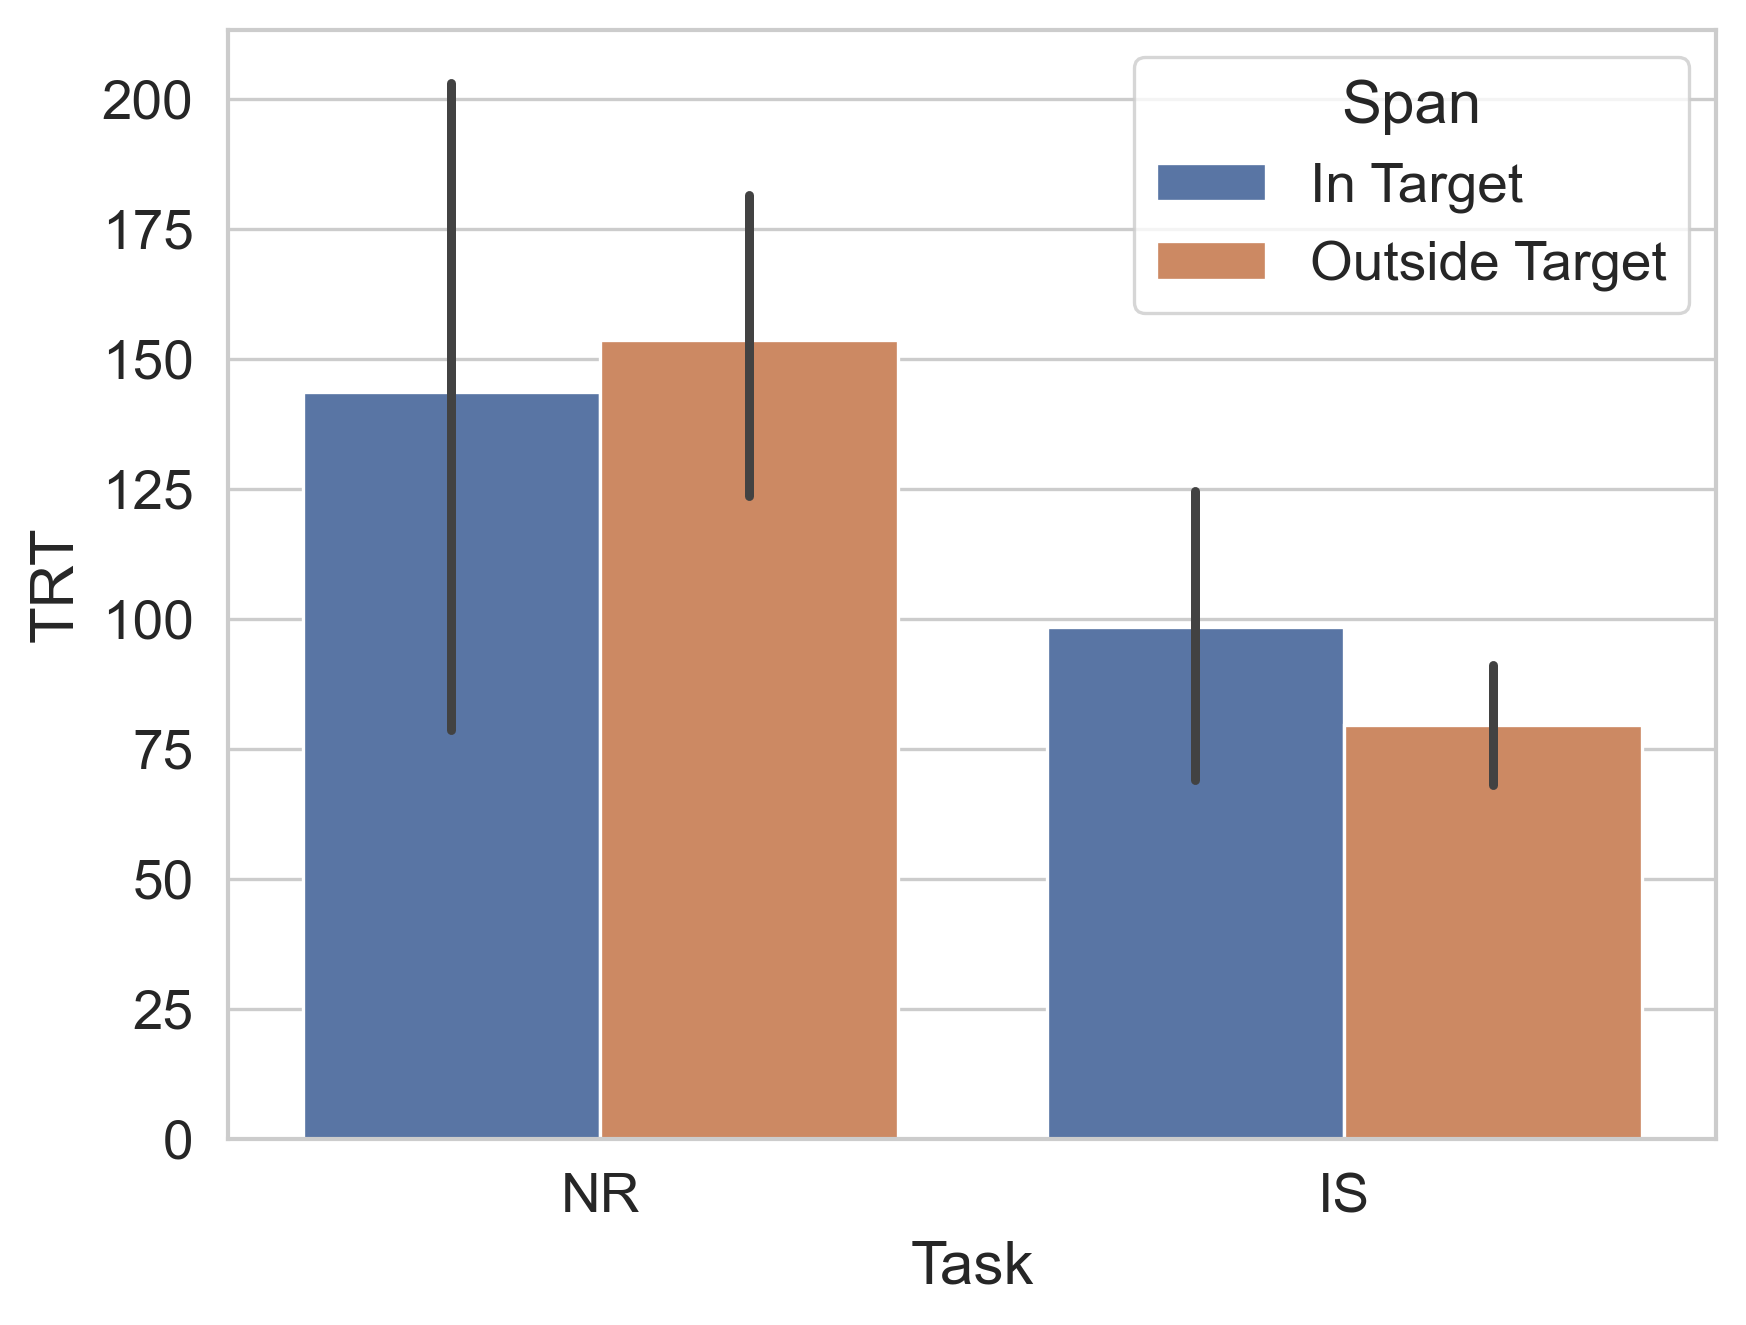

In [128]:
sns.barplot(data=dataframe_to_plot, x="Task", y="TRT", hue="Span")

## Generate in/out Span for all the participants in the filtered data:

In [129]:
# Filters to apply:
approved_only = (all_data.approved_flag > 0).to_numpy() 
no_fixation_error = (all_data.fixation_error == False).to_numpy()
no_target_error = (all_data.target_error == False).to_numpy()
sample_higher_10 = (all_data.webgazer_sample_rate > 10).to_numpy()
acc_higher = (all_data.avg_roi_last_val > 0).to_numpy()
filter_mturks = np.array([False if "link" in worker_id else True for worker_id in all_data["worker_id"]])
filter_sets = np.array([True if set_lang in ["EN","ES","DE"] else False for set_lang in all_data["set_language"]])

screen_x_above_1280 = (all_data.screen_x > 1110).to_numpy() # Some tolerance
screen_y_above_720 = (all_data.screen_y > 615).to_numpy() # Some Tolerance
screen_above_1280_720 = screen_x_above_1280 & screen_y_above_720

mask = approved_only & no_fixation_error & no_target_error & sample_higher_10 & screen_above_1280_720 & acc_higher & filter_mturks & filter_sets
data_filtered = all_data[mask].copy()
print("Before: ", all_data.shape, " After: ", data_filtered.shape)

Before:  (573, 151)  After:  (194, 151)


In [130]:
combined_fix_dataframe = pd.DataFrame(columns=['Task', 'TRT', 'Span', 'TargetID', 'TextID', "SetName", "WorkerID"])
for row_i, row in data_filtered.iterrows():
    set_name = row["set_name"]
    question_text_pair = get_question_answer_pair(combined_text_features, set_name)
    participant_fix_dict = pd.read_csv(os.path.join("pre_processed_data","fixation_data_per_part",f"{row.worker_id}_{set_name}_fix_dict.csv"), index_col=0)
    dataframe_to_plot, _, _ = calculate_mean_trt_in_out_target(question_text_pair, participant_fix_dict)
    dataframe_to_plot["SetName"] = set_name
    dataframe_to_plot["WorkerID"] = row.worker_id
    combined_fix_dataframe = pd.concat((combined_fix_dataframe,dataframe_to_plot))

C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_25140\1685809385.py:33: Ru

In [131]:
combined_fix_dataframe.groupby(["Task", "Span"]).describe()

TRT                                             \
                     count        mean          std   min         25%   
Task Span                                                               
IS   In Target       595.0  249.362960   270.548044  50.0   95.166667   
     Outside Target  915.0  229.922587   920.103476  50.0  104.416667   
NR   In Target       671.0  351.025296  1402.283835  50.0  118.500000   
     Outside Target  955.0  463.488185  2361.460584  63.0  166.302340   

                                                      
                            50%         75%      max  
Task Span                                             
IS   In Target       167.000000  313.916667   2825.0  
     Outside Target  148.833333  231.922027  24724.0  
NR   In Target       220.000000  357.750000  35493.0  
     Outside Target  252.789474  358.536364  49464.0

In [132]:
combined_fix_dataframe.groupby(["Task", "Span"]).describe()

TRT                                             \
                     count        mean          std   min         25%   
Task Span                                                               
IS   In Target       595.0  249.362960   270.548044  50.0   95.166667   
     Outside Target  915.0  229.922587   920.103476  50.0  104.416667   
NR   In Target       671.0  351.025296  1402.283835  50.0  118.500000   
     Outside Target  955.0  463.488185  2361.460584  63.0  166.302340   

                                                      
                            50%         75%      max  
Task Span                                             
IS   In Target       167.000000  313.916667   2825.0  
     Outside Target  148.833333  231.922027  24724.0  
NR   In Target       220.000000  357.750000  35493.0  
     Outside Target  252.789474  358.536364  49464.0

In [133]:
dataframe_to_plot = combined_fix_dataframe.rename(columns={"TRT":"Average Word TRT"})

Text(0, 0.5, 'Average Word TRT (ms)')

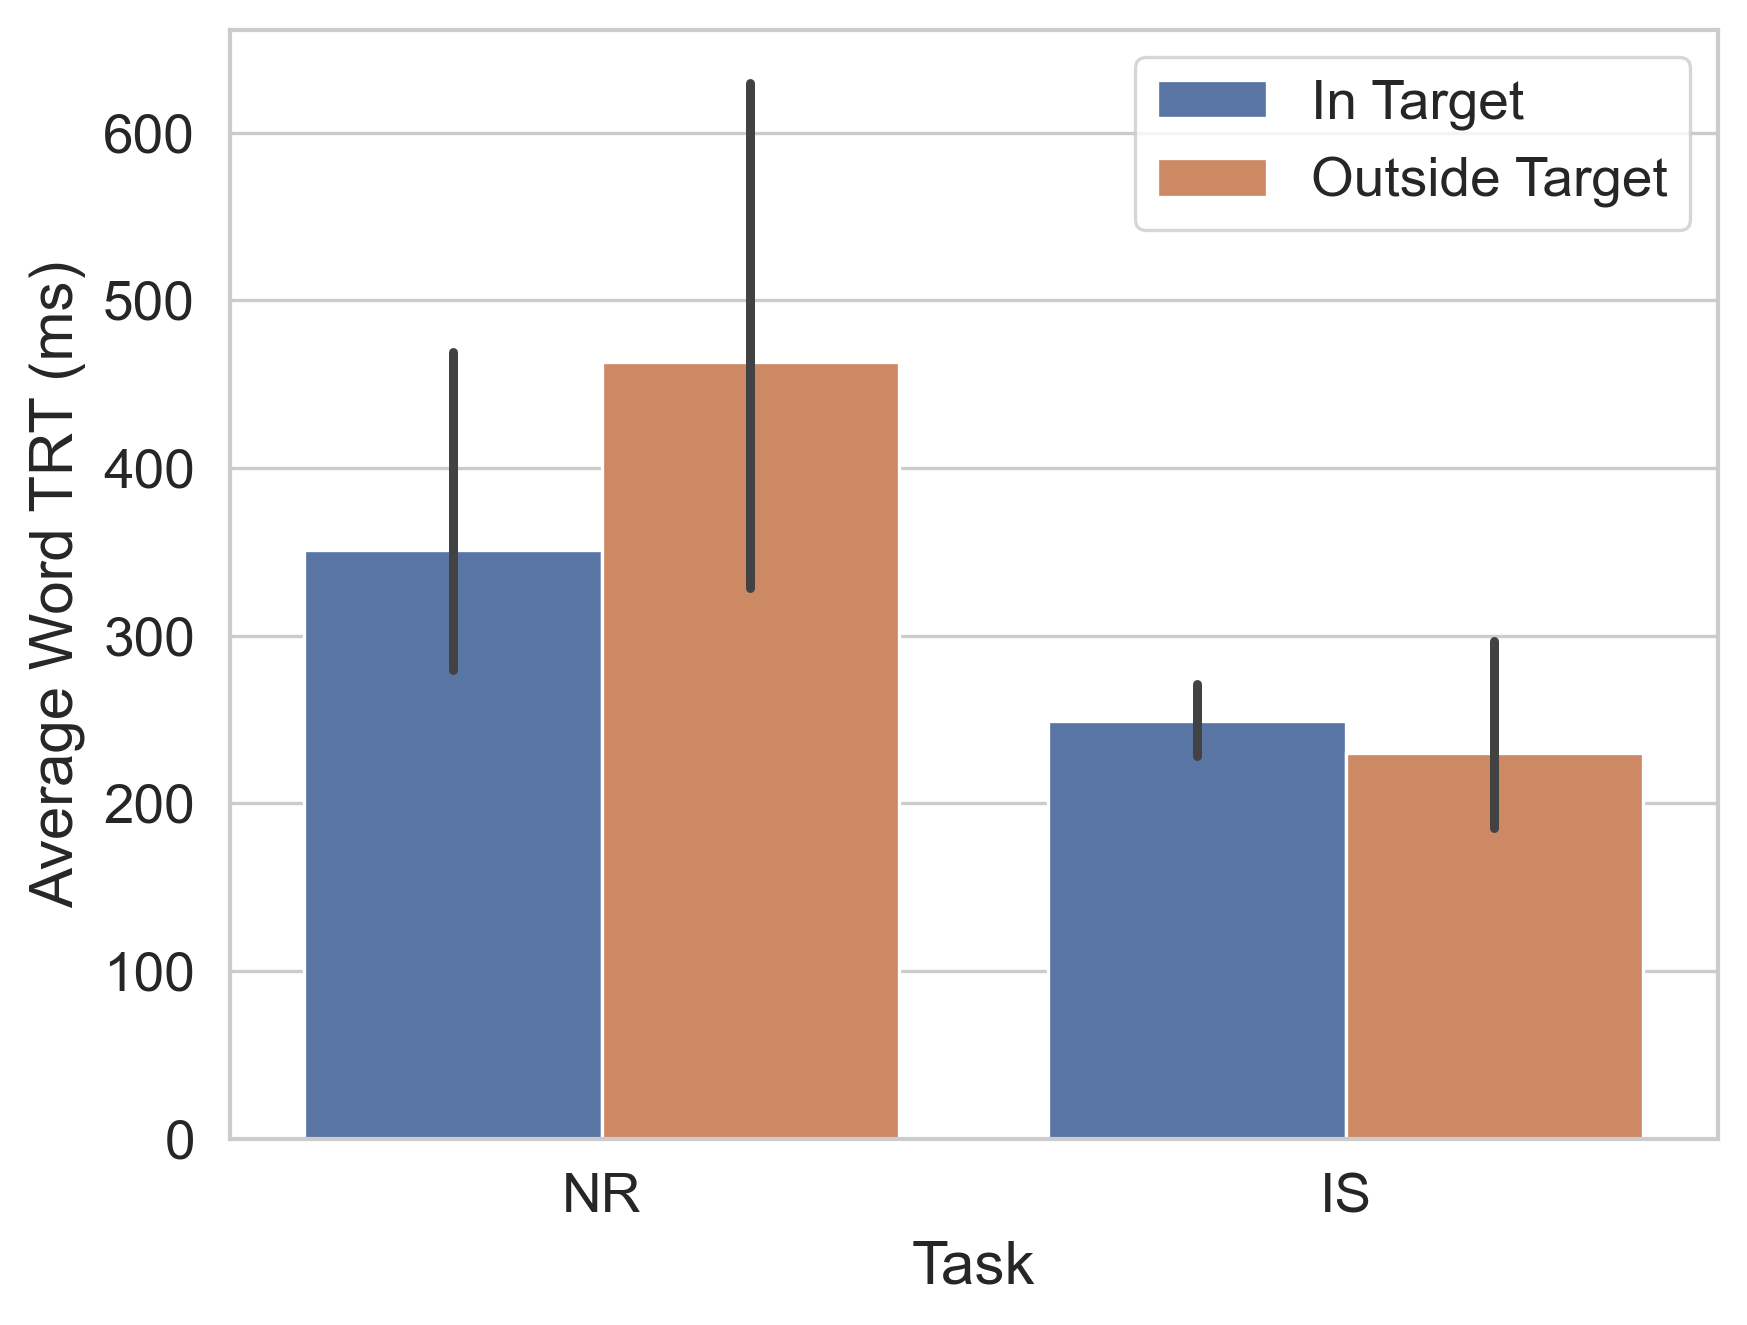

In [132]:
g = sns.barplot(data=dataframe_to_plot, x="Task", y="Average Word TRT", hue="Span")
g.legend_.set_title(None)
plt.ylabel("Average Word TRT (ms)")